In [184]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
from functools import partial

import MicroTools as micro
import MicroTools.plot_tools as pt

import MicroTools.param_scan as param_scan
from tqdm.notebook import tqdm

import MH_decay_scan_run

# 3+1 Oscillation + Decay Scans (Model II - de Gouve)

In [186]:
# Common to Kopp et al
kwargs_modelI = {
    "oscillations": True,
    "decay": True,
    "decouple_decay": False,
    "energy_degradation": True,
    "include_antineutrinos": True,
    "n_replications": 10,
    "helicity": 'conserving',
    "disappearance": True,
    "use_numu_MC": True,
    "undo_numu_normalization": False,
}

# Common to de Gouvea et al
kwargs_modelII = {
    "oscillations": True,
    "decay": True,
    "decouple_decay": True,
    "energy_degradation": True,
    "include_antineutrinos": True,
    "n_replications": 10,
    "helicity": 'conserving',
    "disappearance": True,
    "use_numu_MC": True,
    "undo_numu_normalization": False,
}

In [187]:
PERFORM_SCAN = False

In [188]:
MOCK_SCAN = False
N_MOCK = 2

n = 40 if not MOCK_SCAN else N_MOCK
# 2D scans

if PERFORM_SCAN:
    _ = MH_decay_scan_run.run_scan_gfixed_Ue4SQRfixed_2D(
        kwargs_modelII,
        f"MH_decay_gfixed_1e-3_2D_{n}_{kwargs_modelII['helicity']}_modelII",
        Npoints=n,
        Ue4SQRfixed=0.0,
        gfixed=1e-3,
        dmSq_range=(1e4, 1e9),
        Umu4Sq_range=(1e-4, 0.25),
    )

In [189]:
if PERFORM_SCAN:
    _ = MH_decay_scan_run.run_scan_gfixed_Ue4SQRfixed_2D(
    kwargs_modelII,
    f"MH_decay_gfixed_1e-3_Ue4Sq_0.1_2D_{n}_{kwargs_modelII['helicity']}_modelII",
    Npoints=n,
    Ue4SQRfixed=0.1,
    gfixed=1e-3,
    dmSq_range=(1e4, 1e9),
    Umu4Sq_range=(1e-4, 0.25),
)

In [190]:
n = 30
if PERFORM_SCAN:
    _ = MH_decay_scan_run.run_scan_gfixed_dmfixed_2D(
        kwargs_modelII,
        f"MH_decay_gfixed_1e-3_dmSqfixed_1e8_2D_{n}_{kwargs_modelII['helicity']}_modelII",
        gfixed=1e-3,
        dmSq_fixed=1e8,
        Npoints=n,
        Ue4Sq_range=(1e-3, 0.5),
        Umu4Sq_range=(2e-4, 0.25),
    )

    _ = MH_decay_scan_run.run_scan_gfixed_dmfixed_2D(
        kwargs_modelII,
        f"MH_decay_gfixed_1e-3_dmSqfixed_1e7_2D_{n}_{kwargs_modelII['helicity']}_modelII",
        gfixed=1e-3,
        dmSq_fixed=1e7,
        Npoints=n,
        Ue4Sq_range=(1e-3, 0.5),
        Umu4Sq_range=(2e-4, 0.25),
    )

    _ = MH_decay_scan_run.run_scan_gfixed_dmfixed_2D(
        kwargs_modelII,
        f"MH_decay_gfixed_1e-3_dmSqfixed_1e6_2D_{n}_{kwargs_modelII['helicity']}_modelII",
        gfixed=1e-3,
        dmSq_fixed=1e6,
        Npoints=n,
        Ue4Sq_range=(1e-3, 0.5),
        Umu4Sq_range=(2e-4, 0.25),
    )

    _ = MH_decay_scan_run.run_scan_gfixed_dmfixed_2D(
        kwargs_modelII,
        f"MH_decay_gfixed_1e-3_dmSqfixed_1e4_2D_{n}_{kwargs_modelII['helicity']}_modelII",
        gfixed=1e-3,
        dmSq_fixed=1e4,
        Npoints=n,
        Ue4Sq_range=(1e-3, 0.5),
        Umu4Sq_range=(2e-4, 0.25),
    )


In [191]:
if PERFORM_SCAN:
    _ = MH_decay_scan_run.run_scan_gfixed_3D(
        kwargs_modelII,
        f"MH_decay_gfixed_1e-3_3D_{n}_{kwargs_modelII['helicity']}_modelII",
        gfixed=1e-3,
        Npoints=[20,20,20],
        dmSq_range=(1e-2, 1e12),
        Ue4Sq_range=(1e-4, 0.5),
        Umu4Sq_range=(2e-4, 0.1),
    )


In [192]:
if PERFORM_SCAN:
    _ = MH_decay_scan_run.run_scan_gfixed_3D(
        kwargs_modelI,
        f"MH_decay_gfixed_1e-3_3D_custom_{kwargs_modelI['helicity']}_modelI",
        gfixed=1.0,
        Npoints=[20,20,20],
        dmSq_range=(1e-2, 1e12),
        Ue4Sq_range=(1e-4, 0.5),
        Umu4Sq_range=(2e-4, 0.1),
    )


In [193]:
def make_mixing_vs_mass_plot(dic, mixing='Ue4SQR', name='default', suffix='default', plot_IC=False, plot_Asimov=True, microColor='darkorange', microColor_2='grey', cmap_color='steelblue', n_sigmas=4, cmin=0.05, cmax=0.95, modelII=False, minos_file=None, hatches='////'):
    fig, ax1 = pt.std_fig(figsize=(9, 2.5))
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel(r"$m_4/$keV", fontproperties=pt.font)
    ax1.set_ylabel(r"$|U_{e 4}|^2$" if mixing =='Ue4SQR' else r"$|U_{e 4}|^2$", fontproperties=pt.font)
    ax1.set_title(name, fontsize=9)
    ax1.set_xlim(5e-4, 5e1)
    ax1.set_ylim(dic[mixing].min(), 0.2)

    kwargs_interp = {'fine_gridy': len(np.unique(dic[mixing])),  
                    'fine_gridx': len(np.unique(dic['dm4SQR'])), 
                    'logx':True, 
                    'logy':True,
                    'method': 'interpolate',
                    }
    
    colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
    X, Y, Z = pt.interp_grid(np.sqrt(dic['dm4SQR'])*1e-3, dic[mixing], dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2']), **kwargs_interp)
    cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=colors, zorder=1, alpha=1)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=['black'], linewidths=0.75, zorder=1, alpha=1)
    # ax1.scatter(dic['Umu4SQR'], dic['dm4SQR'], c=np.log10(dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2'])),)
    ax1.scatter(X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], marker='*', facecolor='black', edgecolor='black', lw=0.5, zorder=10)

    X, Y, Z = pt.interp_grid(np.sqrt(dic['dm4SQR'])*1e-3, dic[mixing], dic['MicroApp_chi2']-np.min(dic['MicroApp_chi2']), **kwargs_interp)
    cs = ax1.contourf(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(3,2)]+[np.inf], edgecolors=['None'], colors=['grey'], zorder=0.5)
    cs = ax1.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(3,2)], colors=['black','black'], zorder=4, linewidths=1.5, linestyles=['-', (1,(3,0.5))])
    # cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2), colors=[microColor], zorder=2)
    
    if plot_Asimov:
        X, Y, Z = pt.interp_grid(np.sqrt(dic['dm4SQR'])*1e-3, dic[mixing], dic['MicroApp_Asimov_chi2']-np.min(dic['MicroApp_Asimov_chi2']), **kwargs_interp)
        cs = ax1.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(3,2)], colors=[microColor_2], linestyles=[(1,(3,0.5))], linewidths=1.5, zorder=2)
        ax1.plot([], [], color=microColor_2, lw=1.5, ls=(1,(3,0.5)), label='$\mu$B $3\sigma$ (Asimov)')
    
    if plot_IC:
        path_osc_nuedis = "MicroTools/osc_data/"
        # m4, ue4_percent = np.genfromtxt("MicroTools/osc_data/nue_dis/keV_bounds/Bound7.txt", unpack=True)
        # plt.plot(m4*1e-3, 100*ue4_percent, color='black', lw=1.5, ls='--')
        # kev_labels = [  [100.90, 0.9*np.sqrt(8e-5)],
        #                 [193, np.sqrt(1.304e-4)],
        #                 [1.5*439.299,0.8*np.sqrt(7.65e-5)],
        #                 [1.5*1883.26,0.6*np.sqrt(0.6e-5)],
        #                 [2250.49,np.sqrt(10e-5)],
        #                 [12343.4,np.sqrt(6.96e-8)],
        #                 [23334.6,np.sqrt(10.634e-7)],
        #                 [40277,np.sqrt(2.1919e-6)],
        #                 [348374,1.*np.sqrt(9.46617e-6)],
        #                 [636073,np.sqrt(4.10313e-6)],
        #                 [0.6*1883.26,1.3*np.sqrt(0.2*1.050e-5)],
        #                 [8e4,0.5e-3]]

        x_total = np.geomspace(1e-4, 1e3, 10000)
        y_total = np.ones_like(x_total)
        from scipy.interpolate import interp1d
        for x in range(1,13):
            temp_x, temp_y = np.genfromtxt(f'{path_osc_nuedis}/nue_dis/keV_bounds/Bound{str(x)}.txt', unpack=True, skip_header=0)
            one_line = np.ones(np.size(temp_x))
            if x == 12:
                temp_y*=1e-1
                temp_x*=1e3
            f_limit = interp1d(temp_x/1e3,(temp_y/100.0), kind='linear', bounds_error=False, fill_value=(1,1))
            y_total = np.minimum(y_total, f_limit(x_total))
            # ax1.fill_between(temp_x/1e3,(temp_y/100.0), one_line,\
            #                 color="grey", linestyle="-", lw=0, alpha = 0.5, zorder = 1)
            # ax1.plot(temp_x/1e3,(temp_y/100.0),\
            #                 color="darkgrey", linestyle="-", lw=1, alpha = 1.0, zorder = 1)
            # ax1.text(kev_labels[x-1][0]/1e3, kev_labels[x-1][1], r''+str(x),\
                                # fontsize=8, horizontalalignment='center', verticalalignment='top',color='black')
        
        temp_x, temp_y = np.genfromtxt(f"{path_osc_nuedis}/nue_dis/keV_bounds/F.dat", unpack=True)
        temp_x *= 1e3
        f_limit = interp1d(temp_x,(temp_y), kind='linear', bounds_error=False, fill_value=(1,1))
        y_total = np.minimum(y_total, f_limit(x_total))

    
        ax1.plot(x_total, y_total, color='black', lw=0.75, ls='-', zorder=2)
        ax1.fill_between(x_total, y_total, y_total/y_total,\
                        edgecolor="black",facecolor="gainsboro", linestyle="-", lw=0.75, alpha = 0.5, zorder = 3, label=r'$\beta$ kink (others) $95\%$ CL')
                        # edgecolor="black",facecolor="gainsboro", linestyle="-", lw=0.75, alpha = 0.5, hatch=hatches, zorder = 3, label=r'$\beta$ kink (others) $95\%$ CL')


        x_total = np.geomspace(1e-4, 1e3, 10000)
        y_total = np.ones_like(x_total)
        temp_x, temp_y = np.genfromtxt(f"{path_osc_nuedis}/nue_dis/keV_bounds/KATRIN_2022.dat", unpack=True)
        f_limit = interp1d(temp_x,(temp_y), kind='linear', bounds_error=False, fill_value=(1,1))
        y_total = np.minimum(y_total, f_limit(x_total))
        

        temp_y, temp_x = np.genfromtxt(f"{path_osc_nuedis}/nue_dis/keV_bounds/KATRIN_2022_eV.dat", unpack=True)
        f_limit = interp1d(np.sqrt(temp_x)*1e-3,temp_y/4, kind='linear', bounds_error=False, fill_value=(1,1))
        y_total = np.minimum(y_total, f_limit(x_total))

        ax1.plot(x_total, y_total, color='forestgreen', lw=1, ls='-', zorder=3)
        ax1.fill_between(x_total, y_total, y_total/y_total,\
                        edgecolor="forestgreen",facecolor="forestgreen", linestyle="-", lw=0.75, alpha = 0.5, hatch=hatches, zorder = 3, label=r'$\beta$ kink (KATRIN) $95\%$ CL')

    path_osc_nuedis = "MicroTools/osc_data/"
    Ga2S0 = np.loadtxt(f"{path_osc_nuedis}/nue_dis/Gallium_2sigma_l0.csv", delimiter=",")
    Ga2S1 = np.loadtxt(f"{path_osc_nuedis}/nue_dis/Gallium_2sigma_l1.csv", delimiter=",")
    # Extend to higher masses
    Ga2S1 = np.vstack(([Ga2S1[0,0],Ga2S1[0,1]*1e10], Ga2S1))
    Ga2S1 = np.vstack((Ga2S1, [Ga2S1[-1,0],Ga2S1[-1,1]*1e10]))
    ax1.fill(Ga2S0[:,1]/1e3, Ga2S0[:,0]/4, lw=0.75, edgecolor='None', facecolor='orange', ls='-', zorder=3, alpha=0.6)
    ax1.fill(Ga2S0[:,1]/1e3, Ga2S0[:,0]/4, lw=0.75, edgecolor='orange', facecolor='None', ls='-', zorder=3, alpha=1)
    ax1.fill(Ga2S1[:,1]/1e3, Ga2S1[:,0]/4, lw=0.75, edgecolor='None', facecolor='orange', ls='-', zorder=3, alpha=0.6)
    ax1.fill(Ga2S1[:,1]/1e3, Ga2S1[:,0]/4, lw=0.75, edgecolor='orange', facecolor='None', ls='-', zorder=3, alpha=1, label=r'Gallium 2$\sigma$')
    
    # ax1.hlines([Ga2S1[0,0]/4, Ga2S1[-1,0]/4], [Ga2S1[0,1]/1e3,Ga2S1[-1,1]/1e3], [1e10,1e10], lw=1, color='orange', ls='-', zorder=2)
    ax1.plot([1e-4, 1e12], [0.1704/4, 0.1704/4], lw=1.2, color='orange', ls=(1,(3,1)), zorder=3, label=r'Solar $99\%$ CL')
    # ax1.fill_between([1e-4, 1e12], [0.1704/4, 0.1704/4], [1, 1], lw=1, color='grey', ls='-', zorder=1)    

    RX0 = np.loadtxt(f"{path_osc_nuedis}/nue_dis/Reactor_Spectra_Total.dat")
    x, y, z = RX0.T
    x = 10**x
    y = 10**y
    z = z-np.min(z)
    kwargs_interp = {'fine_gridx': len(np.unique(x)),  
                    'fine_gridy': len(np.unique(y)), 
                    'logx':True, 
                    'logy':True,
                    'method': 'interpolate',
                    }
    X, Y, Z = pt.interp_grid(x, y, z, **kwargs_interp)
    # cs = plt.contourf(np.sqrt(Y)/1e3, X/4, Z, levels=[0]+[pt.get_chi2vals_w_sigma(3, 2)], colors=['indigo'], linestyles=['-'], linewidths=0.0, zorder=2, alpha=0.75)
    cs = plt.contour(np.sqrt(Y)/1e3, X/4, Z, levels=pt.get_chi2vals_w_CL([0.999], 2), colors=['purple'], linestyles=['-'], linewidths=0.0, zorder=2)
    # cs = plt.contour(np.sqrt(Y)/1e3, X, Z, levels=[pt.get_chi2vals_w_sigma(3,2), pt.get_chi2vals_w_sigma(4,2)], colors=['purple'], linestyles=['-'], linewidths=[0.5], zorder=2)
    x = cs.collections[0].get_paths()[0].vertices[:,0]
    x = np.append(x[0]*1e10, x)

    y = cs.collections[0].get_paths()[0].vertices[:,1]
    y = np.append(y[0], y)
# 
    ax1.plot(x, y, color='purple', lw=0.75, ls='-', zorder=1)
    ax1.fill_between(x, y, np.ones_like(y), edgecolor="purple",facecolor="purple", linestyle="-", lw=0, alpha = 0.3, hatch=hatches, zorder = 2, label=r'Reactors $99.9\%$ CL')
    
    # ------ get the legend-entries that are already attached to the axis
    # ax1.plot([], [], color=microColor, lw=1.5, label='$\mu$B 3$\sigma$')
    ax1.fill_between([], [], facecolor='grey', edgecolor='black', lw=0.75, label='$\mu$B 3$\sigma$')
    # ax1.plot([], [], color=microColor, lw=1.5, ls=(1,(3,0.5)), label='$\mu$B 3$\sigma$')
    h, l = ax1.get_legend_handles_labels()
    mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
    leg2 = ax1.legend(h+[pt.MulticolorPatch(colors)], l+[mb_label], loc='lower left', fontsize=8, ncol=4, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()}, facecolor='white', edgecolor='None', frameon=True, framealpha=0.7)

    fig.savefig(f"{micro.path_plots}/MH_decay_{mixing}_profiled_{suffix}.pdf", bbox_inches='tight', dpi=350)

Point found: 0.0025272628045056593


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/3813115168.py:26: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  cs = ax1.contourf(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(3,2)]+[np.inf], edgecolors=['None'], colors=['grey'], zorder=0.5)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/3813115168.py:127: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  x = cs.collections[0].get_paths()[0].vertices[:,0]
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/3813115168.py:130: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  y = cs.collections[0].get_paths()[0].vertices[:,1]


Point found: 0.01019862518420158


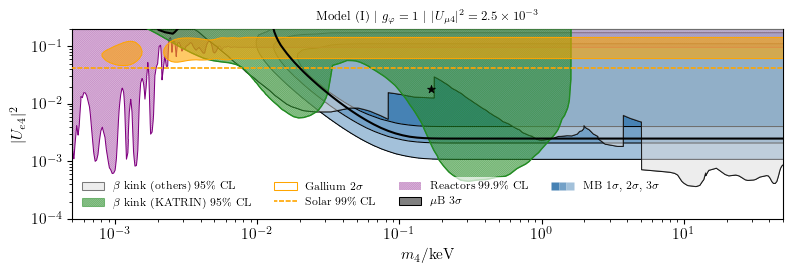

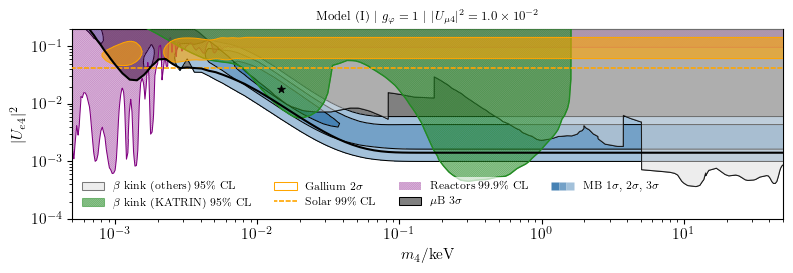

In [194]:
CMAP = 'steelblue'
microColor='black'
microColor_2 = 'darkorange'
 
kwargs = {'plot_Asimov': False, 'plot_IC': True, 'microColor': microColor, 'microColor_2': microColor_2, 'cmap_color': CMAP, 'n_sigmas': 3, 'cmin': 0.0, 'cmax': 0.5, 'hatches': '////////////////'}

dic_model_I = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1_3D_custom_conserving_modelI.pkl')
sub_dic_model_I = param_scan.get_subgrid(dic_model_I, 'Umu4SQR', var_range=[0.0025])
dic_model_I_profUmu4 = param_scan.profile_x_y(sub_dic_model_I, xlabel='Ue4SQR', ylabel='dm4SQR')
make_mixing_vs_mass_plot(dic_model_I_profUmu4, name=r'Model (I) $\vert$ $g_\varphi=1$ $\vert$ $|U_{\mu 4}|^2 = 2.5\times10^{-3}$', suffix='gfixed_1_mix_vs_mass_modelI_Umu4_0.0025', **kwargs)

dic_model_I = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1_3D_custom_conserving_modelI.pkl')
sub_dic_model_I = param_scan.get_subgrid(dic_model_I, 'Umu4SQR', var_range=[0.01])
dic_model_I_profUmu4 = param_scan.profile_x_y(sub_dic_model_I, xlabel='Ue4SQR', ylabel='dm4SQR')
make_mixing_vs_mass_plot(dic_model_I_profUmu4, name=r'Model (I) $\vert$ $g_\varphi=1$ $\vert$ $|U_{\mu 4}|^2 = 1.0\times10^{-2}$', suffix='gfixed_1_mix_vs_mass_modelI_Umu4_0.01', **kwargs)

# dic_model_II = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1e-3_3D_40_conserving_modelII.pkl')
# sub_dic_model_II = param_scan.get_subgrid(dic_model_II, 'Umu4SQR', var_range=[0.005])
# dic_model_II_profUmu4 = param_scan.profile_x_y(sub_dic_model_II, xlabel='Ue4SQR', ylabel='dm4SQR', profile_over_diff_chi2='MiniApp_chi2')
# make_mixing_vs_mass_plot(dic_model_II_profUmu4, name=r'Model (II) $\vert$ $g_e=10^{-3}$ $\vert$ $|U_{\mu 4}|^2 = \left(|U_{\mu 4}|^2\right)_{\chi^2_{\rm MB, min}}$ for $|U_{\mu 4}|^2 < 0.04$', suffix='gfixed_1e-3_mix_vs_mass_modelII', **kwargs)


In [195]:

def make_mixing_vs_mixing_plot(dic, name='default', suffix='default', cmap_color='steelblue', plot_Asimov=True, microColor='black', microColor_2='orange', n_sigmas=4, cmin=0.05, cmax=0.95):
    fig, ax1 = pt.std_fig(figsize=(3.2, 1.5 * 2.3617))
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel(r"$|U_{e 4}|^2$", fontproperties=pt.font)
    ax1.set_ylabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)
    ax1.set_title(name, fontsize=10)
    # ax1.set_xlim(1e-4,0.5)
    # ax1.set_ylim(1e-1,100)   

    kwargs_interp = {'fine_gridx': len(np.unique(dic['Ue4SQR'])),  
                    'fine_gridy': len(np.unique(dic['Umu4SQR'])), 
                    'logx':True, 
                    'logy':True,
                    }
    
    colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
    X, Y, Z = pt.interp_grid(dic["Ue4SQR"], dic['Umu4SQR'], dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2']), **kwargs_interp)
    cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=colors, zorder=1, alpha=0.75)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=['black'], linewidths=0.5, zorder=1, alpha=0.75)
    # ax1.scatter(dic['Umu4SQR'], dic['dm4SQR'], c=np.log10(dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2'])),)
    ax1.scatter(X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], marker='*', facecolor='white', edgecolor='black', lw=0.5, zorder=10)

    X, Y, Z = pt.interp_grid(dic["Ue4SQR"], dic['Umu4SQR'], dic['MicroApp_chi2']-np.min(dic['MicroApp_chi2']), **kwargs_interp)
    # cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2)+[np.inf], edgecolors=['None'], colors=['grey'], zorder=2)
    cs = ax1.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(2, 2),pt.get_chi2vals_w_sigma(3, 2)], colors=[microColor,microColor], linestyles=[(1,(3,0)), (1,(3,1))],zorder=2)
    if plot_Asimov:
        X, Y, Z = pt.interp_grid(dic["Ue4SQR"], dic['Umu4SQR'], dic['MicroApp_Asimov_chi2']-np.min(dic['MicroApp_Asimov_chi2']), **kwargs_interp)
        cs = ax1.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(3, 2)], colors=[microColor_2], linestyles=[(1,(3,1))], zorder=2)
        ax1.plot([], [], color='black', lw=1.5, ls='--', label='$\mu$B 95\% CL (Asimov)')

    ax1.plot([], [], color='black', lw=1.5, label='$\mu$B 95\% CL')
    
    # ------ get the legend-entries that are already attached to the axis
    h, l = ax1.get_legend_handles_labels()
    mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
    leg1 = ax1.legend([pt.MulticolorPatch(colors)], [mb_label], loc='upper right', fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()})
    leg2 = ax1.legend(h, l, loc=(0,0), fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()})
    ax1.add_artist(leg1)
    ax1.add_artist(leg2)

    fig.savefig(f"{micro.path_plots}/MH_decay_Ue4SQR_Umu4SQR_{suffix}.pdf", bbox_inches='tight', dpi=300)

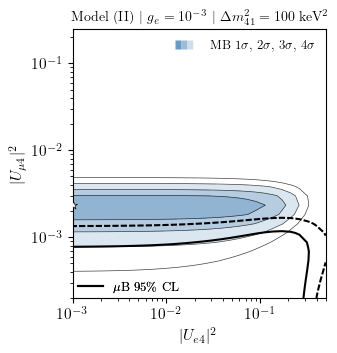

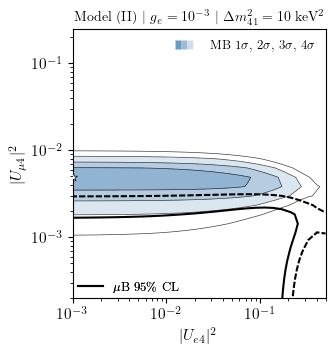

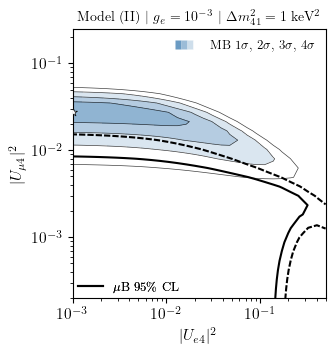

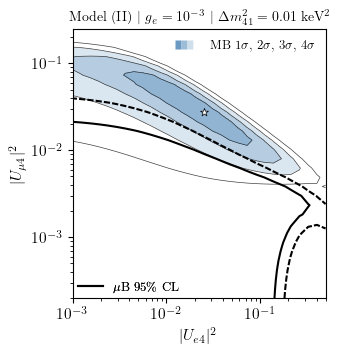

In [16]:
CMAP = 'steelblue'
microColor='black'
microColor_2 = 'darkorange'

kwargs = {'plot_Asimov': False, 'microColor': microColor, 'microColor_2': microColor_2, 'cmap_color': CMAP, 'n_sigmas': 4, 'cmin': 0.2, 'cmax': 1}

dic_gfix_dmfix = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1e-3_dmSqfixed_1e8_2D_30_conserving_modelII.pkl')
make_mixing_vs_mixing_plot(dic_gfix_dmfix,name=r'Model (II) $\vert$ $g_e=10^{-3}$ $\vert$ $\Delta m_{41}^2 = 100$ keV$^2$', suffix='gfixed_1e-3_dmSqfixed_1e8', **kwargs)

dic_gfix_dmfix = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1e-3_dmSqfixed_1e7_2D_30_conserving_modelII.pkl')
make_mixing_vs_mixing_plot(dic_gfix_dmfix,name=r'Model (II) $\vert$ $g_e=10^{-3}$ $\vert$ $\Delta m_{41}^2 = 10$ keV$^2$', suffix='gfixed_1e-3_dmSqfixed_1e7', **kwargs)

dic_gfix_dmfix = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1e-3_dmSqfixed_1e6_2D_30_conserving_modelII.pkl')
make_mixing_vs_mixing_plot(dic_gfix_dmfix,name=r'Model (II) $\vert$ $g_e=10^{-3}$ $\vert$ $\Delta m_{41}^2 = 1$ keV$^2$', suffix='gfixed_1e-3_dmSqfixed_1e6', **kwargs)

dic_gfix_dmfix = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1e-3_dmSqfixed_1e4_2D_30_conserving_modelII.pkl')
make_mixing_vs_mixing_plot(dic_gfix_dmfix,name=r'Model (II) $\vert$ $g_e=10^{-3}$ $\vert$ $\Delta m_{41}^2 = 0.01$ keV$^2$', suffix='gfixed_1e-3_dmSqfixed_1e4', **kwargs)

In [173]:
def make_mass_vs_mixing_plot(dic, mixing='Umu4SQR', name='default', suffix='default', plot_IC=False, plot_Asimov=True, microColor='darkorange', microColor_2='grey', cmap_color='steelblue', n_sigmas=4, cmin=0.05, cmax=0.95, modelII=False, minos_file=None, minos_color='grey'):
    fig, ax1 = pt.std_fig(figsize=(3.2, 1.2 * 2.3617))
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel(r"$|U_{\mu 4}|^2$" if mixing =='Umu4SQR' else r"$|U_{e 4}|^2$", fontproperties=pt.font)
    ax1.set_title(name, fontsize=9)
    ax1.set_ylim(dic['dm4SQR'].min(), dic['dm4SQR'].max())
    # ax1.set_ylim(1e4, dic['dm4SQR'].max())
    ax1.set_xlim(dic[mixing].min(), dic[mixing].max())
    # ax1.set_xlim(dic[mixing].min(), 0.2)

    kwargs_interp = {'fine_gridx': len(np.unique(dic[mixing])),  
                    'fine_gridy': len(np.unique(dic['dm4SQR'])), 
                    'logx':True, 
                    'logy':True,
                    'method': 'interpolate',
                    }
    
    colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
    X, Y, Z = pt.interp_grid(dic[mixing], dic['dm4SQR'], dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2']), **kwargs_interp)
    cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=colors, zorder=1, alpha=1)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=['black'], linewidths=0.25, zorder=1, alpha=1)
    # ax1.scatter(dic['Umu4SQR'], dic['dm4SQR'], c=np.log10(dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2'])),)
    ax1.scatter(X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], marker='*', facecolor='black', edgecolor='black', lw=0.5, zorder=10)

    X, Y, Z = pt.interp_grid(dic[mixing], dic['dm4SQR'], dic['MicroApp_chi2']-np.min(dic['MicroApp_chi2']), **kwargs_interp)
    # cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2)+[np.inf], edgecolors=['None'], colors=['grey'], zorder=2)
    cs = ax1.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(2,2),pt.get_chi2vals_w_sigma(3,2)], colors=[microColor,microColor], zorder=2, linewidths=1.5, linestyles=['-', (1,(3,0.5))])
    # cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2), colors=[microColor], zorder=2)
    ax1.plot([], [], color=microColor, lw=1.5, label='$\mu$B 2$\sigma$')
    ax1.plot([], [], color=microColor, lw=1.5, ls=(1,(3,0.5)), label='$\mu$B 3$\sigma$')

    if plot_Asimov:
        X, Y, Z = pt.interp_grid(dic[mixing], dic['dm4SQR'], dic['MicroApp_Asimov_chi2']-np.min(dic['MicroApp_Asimov_chi2']), **kwargs_interp)
        cs = ax1.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(3,2)], colors=[microColor_2], linestyles=[(1,(3,0.5))], linewidths=1.5, zorder=2)
        ax1.plot([], [], color=microColor_2, lw=1.5, ls=(1,(3,0.5)), label='$\mu$B $3\sigma$ (Asimov)')
    
    # ------ get the legend-entries that are already attached to the axis
    # ------ get the legend-entries that are already attached to the axis
    h, l = ax1.get_legend_handles_labels()
    mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
    leg1 = ax1.legend([pt.MulticolorPatch(colors)], [mb_label], loc='upper right', fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()}, facecolor='white', edgecolor='None', frameon=True, framealpha=0.8)
    leg2 = ax1.legend(h, l, loc=(0.025,0), fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()}, facecolor='white', edgecolor='None', frameon=True, framealpha=0.7)
    ax1.add_artist(leg1)
    # ax1.add_artist(leg2)

    if plot_IC:
        x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_90CL.dat', unpack=True)
        x,y = pt.get_ordered_closed_region([x,y], logx=True, logy=True)
        ax1.fill(x, y, facecolor='orange', edgecolor='darkorange', lw=0.5, ls='-', alpha=0.25, hatch='')
        ax1.annotate('IC 90\% CL', xy=(0.038, 2.8), xycoords='data', rotation=12, color='darkorange', fontsize=9)
        ax1.annotate('IC 99\% CL', xy=(0.048, 0.5), xycoords='data', rotation=18, color='darkorange', fontsize=9)
        x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_99CL.dat', unpack=True)
        ax1.plot(x, y, color='darkorange', lw=1, ls='-', alpha=1,zorder=4)
        ax1.fill_betweenx([0,1e10], [4.1e-2, 4.1e-2], [1,1], facecolor='grey', edgecolor='grey', lw=0.5, ls='-', alpha=0.15, hatch='')
        ax1.vlines(4.1e-2,0,1e10, color='grey', lw=0.5, ls='-')
        ax1.annotate(r'SK 90\% CL', xy=(4.8e-2, ax1.get_ylim()[1]/270), xycoords='data', rotation=90, color='grey', fontsize=7, zorder=3)
    
        if minos_file is not None:
            g_minos, th24, dm241, chi2 = np.genfromtxt(minos_file, unpack=True, )
            sin22theta24 = np.sin(th24)**2
            kwargs_interp = {'fine_gridx': len(np.unique(sin22theta24)),  
                            'fine_gridy': len(np.unique(dm241)), 
                            'logx':True, 
                            'logy':True,
                            'method': 'interpolate',
                            }
            X, Y, Z = pt.interp_grid(sin22theta24, dm241, chi2 - np.min(chi2), **kwargs_interp)
            cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.9], 2), colors=['None'], linestyles=[(1,(2,1))], linewidths=0.01, zorder=1, alpha=1)
            x = cs.collections[0].get_paths()[0].vertices[:,0]
            y = cs.collections[0].get_paths()[0].vertices[:,1]
            
            x = np.append(x, x[np.argmax(y)])            
            y = np.append(y, np.max(y)*1e3)
            x = x[np.argsort(y)]
            y = np.sort(y)

            ax1.plot(x, y, color=minos_color, lw=0.75, ls='-', zorder=1)
            ax1.fill_betweenx(y, x, np.ones_like(x), edgecolor='None', facecolor=minos_color, linestyle="-", lw=0, alpha = 0.3, zorder = 2, label=r'MINOS/MINOS+ $90\%$ CL')
            
            
        if modelII:

            ax1.set_yticklabels(ax1.get_yticks()/1e6)
            ax1.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{keV^2}]$', fontproperties=pt.font)
            
            # MINOS/MINOS+
            # ax1.fill_betweenx([0,1e10], [3.8e-2, 3.8e-2], [1,1], facecolor='orange', edgecolor='darkorange', lw=0.5, ls='-', alpha=0.15, hatch='')
            # # ax1.fill_betweenx([0,1e10], [7.3e-2, 7.3e-2], [1,1], facecolor='orange', edgecolor='darkorange', lw=0.5, ls='-', alpha=0.15, hatch='')
            # ax1.vlines(3.8e-2,0,1e10, color='darkorange', lw=0.5, ls='-')
            ax1.annotate(r'\noindent MINOS 90\% CL', xy=(2e-2, ax1.get_ylim()[1]/270), xycoords='data', rotation=90, color=minos_color, fontsize=7, zorder=3)
        
        x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_99CL.dat', unpack=True)
        ax1.plot(x, y, color='darkorange', lw=1, ls='-', alpha=1,zorder=4)
        # x, y = np.genfromtxt(f"MicroTools/osc_data/numu_dis/MINOSPlus_90CL.csv", delimiter=",", unpack=True)
        # plt.plot(x, y/(1e-3)**2, color='darkorange', lw=1, ls=(1,(3,1)), alpha=1)

    fig.savefig(f"{micro.path_plots}/MH_decay_{mixing}_profiled_{suffix}.pdf", bbox_inches='tight', dpi=350)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/3807178121.py:72: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  x = cs.collections[0].get_paths()[0].vertices[:,0]
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/3807178121.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  y = cs.collections[0].get_paths()[0].vertices[:,1]


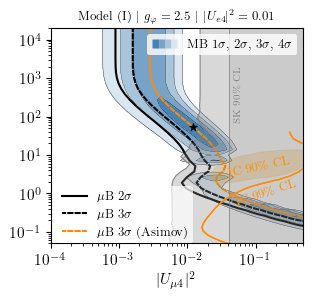

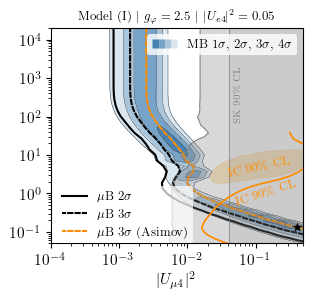

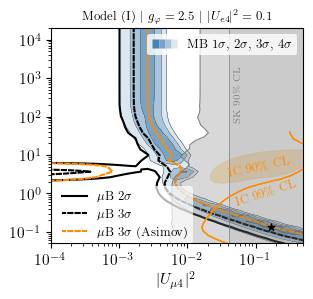

In [196]:
CMAP = 'steelblue'
microColor='black'
microColor_2 = 'darkorange'

kwargs = {'plot_IC': True, 'plot_Asimov': True, 'microColor': microColor, 'microColor_2': microColor_2, 'cmap_color': CMAP, 'n_sigmas': 4, 'cmin': 0.0, 'cmax': 0.8}

# dic_dec_gfixed_2p5_solar = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.05_2D_30_conserving_modelI.pkl')
dic_dec_gfixed_2p5_small = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.01_2D_40.pkl')
make_mass_vs_mixing_plot(dic_dec_gfixed_2p5_small, mixing='Umu4SQR',     name=r'Model (I) $\vert$ $g_\varphi=2.5$ $\vert$ $|U_{e4}|^2 = 0.01$', suffix='gfixed_2.5_small', minos_file='MinosTools/test_chi2_sterile_g_decay_2.5_50.dat', **kwargs)
# dic_dec_gfixed_2p5_solar = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.05_2D_30_conserving_modelI.pkl')
dic_dec_gfixed_2p5_solar = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.05_2D_40.pkl')
make_mass_vs_mixing_plot(dic_dec_gfixed_2p5_solar, mixing='Umu4SQR', name=r'Model (I) $\vert$ $g_\varphi=2.5$ $\vert$ $|U_{e4}|^2 = 0.05$', suffix='gfixed_2.5_solar', minos_file='MinosTools/test_chi2_sterile_g_decay_2.5_50.dat', **kwargs)
# dic_dec_gfixed_2p5_BEST = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.10_2D_30_conserving_modelI.pkl')
dic_dec_gfixed_2p5_BEST = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.10_2D_40.pkl')
make_mass_vs_mixing_plot(dic_dec_gfixed_2p5_BEST, mixing='Umu4SQR', name=r'Model (I) $\vert$ $g_\varphi=2.5$ $\vert$ $|U_{e4}|^2 = 0.1$', suffix='gfixed_2.5_BEST', minos_file='MinosTools/test_chi2_sterile_g_decay_2.5_50.dat', **kwargs)


# dic_dec_gfixed_1p0_small = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1_Ue4SQRfixed_0.01_2D_40.pkl')
# make_mass_vs_mixing_plot(dic_dec_gfixed_1p0_small, mixing='Umu4SQR', name=r'Model (I) $\vert$ $g_\varphi=2.5$ $\vert$ $|U_{e4}|^2 = 0.01$', suffix='gfixed_1.0_small', **kwargs)
# # dic_dec_gfixed_1p0_solar = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_Ue4SQRfixed_0.05_2D_30_conserving_modelI.pkl')
# dic_dec_gfixed_1p0_solar = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1_Ue4SQRfixed_0.05_2D_40.pkl')
# make_mass_vs_mixing_plot(dic_dec_gfixed_1p0_solar, mixing='Umu4SQR', name=r'Model (I) $\vert$ $g_\varphi=2.5$ $\vert$ $|U_{e4}|^2 = 0.05$', suffix='gfixed_1.0_solar', **kwargs)
# # dic_dec_gfixed_1p0_BEST = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_Ue4SQRfixed_0.10_2D_30_conserving_modelI.pkl')
# dic_dec_gfixed_1p0_BEST = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1_Ue4SQRfixed_0.10_2D_40.pkl')
# make_mass_vs_mixing_plot(dic_dec_gfixed_1p0_BEST, mixing='Umu4SQR', name=r'Model (I) $\vert$ $g_\varphi=1.0$ $\vert$ $|U_{e4}|^2 = 0.1$', suffix='gfixed_1.0_BEST', **kwargs)

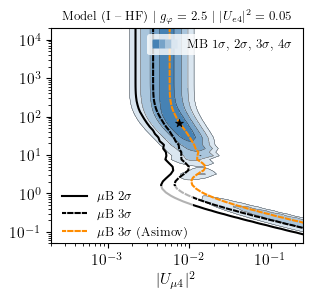

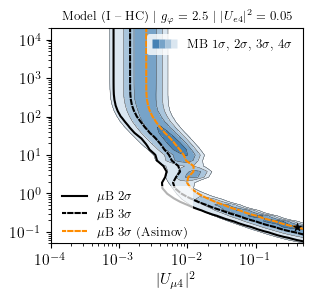

In [199]:
CMAP = 'steelblue'
microColor='black'
microColor_2 = 'darkorange'

kwargs = {'plot_IC': False, 'plot_Asimov': True, 'microColor': microColor, 'microColor_2': microColor_2, 'cmap_color': CMAP, 'n_sigmas': 4, 'cmin': 0.0, 'cmax': 0.8}

dic_dec_gfixed_2p5_solar_flip = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.05_2D_60_flipping.pkl')
make_mass_vs_mixing_plot(dic_dec_gfixed_2p5_solar_flip, mixing='Umu4SQR', name=r'Model (I -- HF) $\vert$ $g_\varphi=2.5$ $\vert$ $|U_{e4}|^2 = 0.05$', suffix='gfixed_2.5_solar_flip', minos_file='MinosTools/test_chi2_sterile_g_decay_2.5_50.dat', **kwargs)

dic_dec_gfixed_2p5_solar = param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_Ue4SQRfixed_0.05_2D_40.pkl')
make_mass_vs_mixing_plot(dic_dec_gfixed_2p5_solar, mixing='Umu4SQR', name=r'Model (I -- HC) $\vert$ $g_\varphi=2.5$ $\vert$ $|U_{e4}|^2 = 0.05$', suffix='gfixed_2.5_solar', minos_file='MinosTools/test_chi2_sterile_g_decay_2.5_50.dat', **kwargs)


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/2574845354.py:70: UserWarning: linewidths is ignored by contourf
  cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.9,1], 2), colors=[minos_color], linewidths=0, zorder=1, alpha=0.15)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/2574845354.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks()/1e6)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/2574845354.py:70: UserWarning: linewidths is ignored by contourf
  cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.9,1], 2), colors=[minos_color], linewidths=0, zorder=1, alpha=0.15)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_24728/2574845354.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(

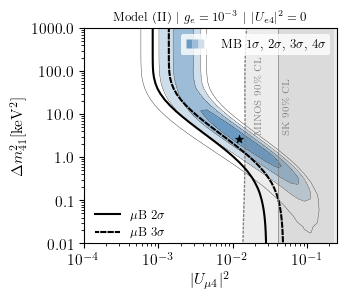

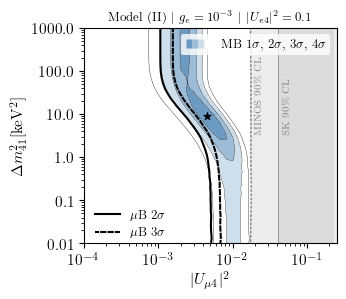

In [86]:
CMAP = 'steelblue'
microColor='black'
microColor_2 = 'darkorange'

kwargs = {'plot_IC': True, 'plot_Asimov': False, 'microColor': microColor, 'microColor_2': microColor_2, 'cmap_color': CMAP, 'n_sigmas': 4, 'cmin': 0.2, 'cmax': 1, 'modelII': True}

dic_dec_gfixed_0p001 = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1e-3_2D_40_conserving_modelII.pkl')
make_mass_vs_mixing_plot(dic_dec_gfixed_0p001, mixing='Umu4SQR', name=r'Model (II) $\vert$ $g_e=10^{-3}$ $\vert$ $|U_{e4}|^2 = 0$', suffix='gfixed_1e-3', minos_file="MinosTools/test_chi2_sterile_g_decay_0.001_20_ue4_0.0.dat", **kwargs)
dic_dec_gfixed_0p001_BEST = param_scan.load_scan_data('fit_data/MH_decay_gfixed_1e-3_Ue4Sq_0.1_2D_40_conserving_modelII.pkl')
make_mass_vs_mixing_plot(dic_dec_gfixed_0p001_BEST, mixing='Umu4SQR', name=r'Model (II) $\vert$ $g_e=10^{-3}$ $\vert$ $|U_{e4}|^2 = 0.1$', suffix='gfixed_1e-3_BEST', minos_file="MinosTools/test_chi2_sterile_g_decay_0.001_20_ue4_0.1.dat", **kwargs)

# 3+1 Oscillation + Decay Scans

In [87]:
n = 30 if not MOCK_SCAN else N_MOCK
if PERFORM_SCAN:
    # 2D scans
    _ = MH_decay_scan_run.run_scan_gfixed_Ue4SQRfixed_2D(
        kwargs_modelI,
        f"MH_decay_gfixed_2.5_Ue4SQRfixed_0.05_2D_{n}_{kwargs_modelI['helicity']}_modelI",
        Npoints=n,
        Ue4SQRfixed=0.05,
        gfixed=2.5,
    )

    # 2D scans
    _ = MH_decay_scan_run.run_scan_gfixed_Ue4SQRfixed_2D(
        kwargs_modelI,
        f"MH_decay_gfixed_2.5_Ue4SQRfixed_0.10_2D_{n}_{kwargs_modelI['helicity']}_modelI",
        Npoints=n,
        Ue4SQRfixed=0.1,
        gfixed=2.5,
    )

    # 2D scans
    _ = MH_decay_scan_run.run_scan_gfixed_Ue4SQRfixed_2D(
        kwargs_modelI,
        f"MH_decay_gfixed_1.0_Ue4SQRfixed_0.05_2D_{n}_{kwargs_modelI['helicity']}_modelI",
        Npoints=n,
        Ue4SQRfixed=0.05,
        gfixed=1,
    )

    # 2D scans
    _ = MH_decay_scan_run.run_scan_gfixed_Ue4SQRfixed_2D(
        kwargs_modelI,
        f"MH_decay_gfixed_1.0_Ue4SQRfixed_0.10_2D_{n}_{kwargs_modelI['helicity']}_modelI",
        Npoints=n,
        Ue4SQRfixed=0.1,
        gfixed=1,
    )

In [41]:
print(param_scan.get_best_fit_point(dic_dec_gfixed_2p5_small), param_scan.get_best_fit_point_MBpval(dic_dec_gfixed_2p5_small, ndof=20+2*8-1), param_scan.get_best_fit_point_DeltaMicroChi2(dic_dec_gfixed_2p5_small))
print(param_scan.get_best_fit_point(dic_dec_gfixed_2p5_solar), param_scan.get_best_fit_point_MBpval(dic_dec_gfixed_2p5_solar, ndof=20+2*8-1), param_scan.get_best_fit_point_DeltaMicroChi2(dic_dec_gfixed_2p5_solar))
print(param_scan.get_best_fit_point(dic_dec_gfixed_2p5_BEST), param_scan.get_best_fit_point_MBpval(dic_dec_gfixed_2p5_BEST, ndof=20+2*8-1), param_scan.get_best_fit_point_DeltaMicroChi2(dic_dec_gfixed_2p5_BEST))

print(param_scan.get_best_fit_point(dic_dec_gfixed_1p0_small), param_scan.get_best_fit_point_MBpval(dic_dec_gfixed_1p0_small, ndof=20+2*8-1), param_scan.get_best_fit_point_DeltaMicroChi2(dic_dec_gfixed_1p0_small))
print(param_scan.get_best_fit_point(dic_dec_gfixed_1p0_solar), param_scan.get_best_fit_point_MBpval(dic_dec_gfixed_1p0_solar, ndof=20+2*8-1), param_scan.get_best_fit_point_DeltaMicroChi2(dic_dec_gfixed_1p0_solar))
print(param_scan.get_best_fit_point(dic_dec_gfixed_1p0_BEST), param_scan.get_best_fit_point_MBpval(dic_dec_gfixed_1p0_BEST, ndof=20+2*8-1), param_scan.get_best_fit_point_DeltaMicroChi2(dic_dec_gfixed_1p0_BEST))


{'g': 2.5, 'm4': 7.206624982959387, 'Ue4Sq': 0.01, 'Um4Sq': 0.012206705418775088, 'sin2theta': 0.000488, 'dm4SQR': 51.93544364501439, 'MiniApp_chi2': 36.186484176957904, 'MicroApp_chi2': 114.73750121395923, 'MicroApp_Asimov_chi2': 14.404660585502768, 'MiniApp_deltachi2': 0.0, 'MicroApp_deltachi2': 22.794717374122627, 'MicroApp_Asimov_deltachi2': 11.595275371640458} 0.4130104716274652 22.794717374122627
{'g': 2.5, 'm4': 0.3672390438532148, 'Ue4Sq': 0.05, 'Um4Sq': 0.401906120162261, 'sin2theta': 0.080381, 'dm4SQR': 0.13486451533022345, 'MiniApp_chi2': 36.13348171939802, 'MicroApp_chi2': 114.41217664733502, 'MicroApp_Asimov_chi2': 14.973355889432579, 'MiniApp_deltachi2': 0.0, 'MicroApp_deltachi2': 24.287355141650806, 'MicroApp_Asimov_deltachi2': 12.163780689651217} 0.4154222889845253 24.287355141650806
{'g': 2.5, 'm4': 0.3672390438532148, 'Ue4Sq': 0.1, 'Um4Sq': 0.16778111673912144, 'sin2theta': 0.067112, 'dm4SQR': 0.13486451533022345, 'MiniApp_chi2': 35.80129986082234, 'MicroApp_chi2': 11

# 3D and 4D plots

In [42]:
dic_full_prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl'), xlabel='sin2theta', ylabel='dm4SQR')
dic_g_one_prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=0, w_fixed=1), xlabel='sin2theta', ylabel='dm4SQR')
dic_g_twofive_prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=0, w_fixed=2.5), xlabel='sin2theta', ylabel='dm4SQR')

dic_Ue4sqr_solar_prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=2, w_fixed=0.05), xlabel='sin2theta', ylabel='dm4SQR')
dic_Ue4sqr_BEST_prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=2, w_fixed=0.1), xlabel='sin2theta', ylabel='dm4SQR')


data_full_gfixed_2p5_Umu4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_3D_40.pkl'), xlabel='Umu4SQR', ylabel='dm4SQR')
data_full_gfixed_2p5_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_3D_40.pkl'), xlabel='Ue4SQR', ylabel='dm4SQR')

data_full_gfixed_2p5_solar_Umu4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_3D_40.pkl', wi=2, w_fixed=0.05), xlabel='Umu4SQR', ylabel='dm4SQR')
data_full_gfixed_2p5_best_Umu4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_3D_40.pkl', wi=2, w_fixed=0.1), xlabel='Umu4SQR', ylabel='dm4SQR')

data_full_gfixed_2p5_small_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_3D_40.pkl', wi=3, w_fixed=0.01), xlabel='Ue4SQR', ylabel='dm4SQR')
data_full_gfixed_2p5_solar_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_3D_40.pkl', wi=3, w_fixed=0.05), xlabel='Ue4SQR', ylabel='dm4SQR')
data_full_gfixed_2p5_best_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_2.5_3D_40.pkl', wi=3, w_fixed=0.1), xlabel='Ue4SQR', ylabel='dm4SQR')


data_full_gfixed_1p0_Umu4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_3D_40.pkl'), xlabel='Umu4SQR', ylabel='dm4SQR')
data_full_gfixed_1p0_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_3D_40.pkl'), xlabel='Ue4SQR', ylabel='dm4SQR')

data_full_gfixed_1p0_solar_Umu4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_3D_40.pkl', wi=2, w_fixed=0.05), xlabel='Umu4SQR', ylabel='dm4SQR')
data_full_gfixed_1p0_best_Umu4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_3D_40.pkl', wi=2, w_fixed=0.1), xlabel='Umu4SQR', ylabel='dm4SQR')

data_full_gfixed_1p0_small_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_3D_40.pkl', wi=3, w_fixed=0.01), xlabel='Ue4SQR', ylabel='dm4SQR')
data_full_gfixed_1p0_solar_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_3D_40.pkl', wi=3, w_fixed=0.05), xlabel='Ue4SQR', ylabel='dm4SQR')
data_full_gfixed_1p0_best_Ue4prof = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_gfixed_1.0_3D_40.pkl', wi=3, w_fixed=0.1), xlabel='Ue4SQR', ylabel='dm4SQR')

In [43]:
data_full_gfixed_2p5_dmfixed_100 = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=1, w_fixed=100, w2i=0, w2_fixed=2.5, ), xlabel='Ue4SQR', ylabel='Umu4SQR')
data_full_gfixed_1p0_dmfixed_100 = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=1, w_fixed=100, w2i=0, w2_fixed=1.0, ), xlabel='Ue4SQR', ylabel='Umu4SQR')

data_full_gfixed_2p5_dmfixed_500 = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=1, w_fixed=500, w2i=0, w2_fixed=2.5, ), xlabel='Ue4SQR', ylabel='Umu4SQR')
data_full_gfixed_1p0_dmfixed_500 = param_scan.profile_x_y(param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl', wi=1, w_fixed=500, w2i=0, w2_fixed=1.0, ), xlabel='Ue4SQR', ylabel='Umu4SQR')

### Mixing vs dm4 (fixed other)

In [160]:
def make_mass_vs_mixing_plot(dic, mixing='Umu4SQR', name='default', suffix='default', plot_IC=False, plot_Asimov=True, cmap_color='steelblue', n_sigmas=4, cmin=0.05, cmax=0.95):
    fig, ax1 = pt.std_fig(figsize=(3.2, 1.5 * 2.3617))
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel(r"$|U_{\mu 4}|^2$" if mixing =='Umu4SQR' else r"$|U_{e 4}|^2$", fontproperties=pt.font)
    ax1.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)
    ax1.set_title(name, fontsize=10)
    ax1.set_ylim(dic['dm4SQR'].min(), dic['dm4SQR'].max())
    ax1.set_xlim(dic[mixing].min(), dic[mixing].max())
    

    kwargs_interp = {'fine_gridx': len(np.unique(dic[mixing])),  
                    'fine_gridy': len(np.unique(dic['dm4SQR'])), 
                    'logx':True, 
                    'logy':True,
                    'method': 'interpolate',
                    }
    
    colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
    X, Y, Z = pt.interp_grid(dic[mixing], dic['dm4SQR'], dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2']), **kwargs_interp)
    cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=colors, zorder=1, alpha=0.75)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=['black'], linewidths=0.5, zorder=1, alpha=0.75)
    # ax1.scatter(dic['Umu4SQR'], dic['dm4SQR'], c=np.log10(dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2'])),)
    ax1.scatter(X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], marker='*', facecolor='white', edgecolor='black', lw=0.5, zorder=10)

    X, Y, Z = pt.interp_grid(dic[mixing], dic['dm4SQR'], dic['MicroApp_chi2']-np.min(dic['MicroApp_chi2']), **kwargs_interp)
    # cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2)+[np.inf], edgecolors=['None'], colors=['grey'], zorder=2)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2), colors=['black'], zorder=2)
    ax1.plot([], [], color='black', lw=1.5, label='$\mu$B 95\% CL')

    if plot_Asimov:
        X, Y, Z = pt.interp_grid(dic[mixing], dic['dm4SQR'], dic['MicroApp_Asimov_chi2']-np.min(dic['MicroApp_Asimov_chi2']), **kwargs_interp)
        cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2), colors=['black'], linestyles=[(1,(3,1))], zorder=2)
        ax1.plot([], [], color='black', lw=1.5, ls='--', label='$\mu$B 95\% CL (Asimov)')
    
    # ------ get the legend-entries that are already attached to the axis
    # ------ get the legend-entries that are already attached to the axis
    h, l = ax1.get_legend_handles_labels()
    mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
    leg1 = ax1.legend([pt.MulticolorPatch(colors)], [mb_label], loc='upper right', fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()}, facecolor='white', edgecolor='None', frameon=True, framealpha=0.8)
    leg2 = ax1.legend(h, l, loc=(0,0), fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()}, facecolor='white', edgecolor='None', frameon=True, framealpha=0.8)
    ax1.add_artist(leg1)
    # ax1.add_artist(leg2)

    if plot_IC:
        x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_90CL.dat', unpack=True)
        x,y = pt.get_ordered_closed_region([x,y], logx=True, logy=True)
        ax1.fill(x, y, facecolor='orange', edgecolor='darkorange', lw=0.5, ls='-', alpha=0.25, hatch='')
        ax1.annotate('IC 90\% CL', xy=(0.038, 2.8), xycoords='data', rotation=12, color='darkorange', fontsize=9)
        ax1.annotate('IC 99\% CL', xy=(0.048, 0.5), xycoords='data', rotation=18, color='darkorange', fontsize=9)
        x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_99CL.dat', unpack=True)
        ax1.plot(x, y, color='darkorange', lw=1, ls='-', alpha=1,zorder=4)

    fig.savefig(f"{micro.path_plots}/MH_decay_{mixing}_profiled_{suffix}.pdf", bbox_inches='tight', dpi=300)

def make_mixing_vs_mixing_plot(dic, name='default', suffix='default', plot_IC=False, cmap_color='steelblue', n_sigmas=4, cmin=0.05, cmax=0.95):
    fig, ax1 = pt.std_fig(figsize=(3.2, 1.5 * 2.3617))
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel(r"$|U_{e 4}|^2$", fontproperties=pt.font)
    ax1.set_ylabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)
    ax1.set_title(name, fontsize=10)
    # ax1.set_xlim(1e-4,0.5)
    # ax1.set_ylim(1e-1,100)   

    kwargs_interp = {'fine_gridx': len(np.unique(dic['Ue4SQR'])),  
                    'fine_gridy': len(np.unique(dic['Umu4SQR'])), 
                    'logx':True, 
                    'logy':True,
                    }
    
    colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
    X, Y, Z = pt.interp_grid(dic["Ue4SQR"], dic['Umu4SQR'], dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2']), **kwargs_interp)
    cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=colors, zorder=1, alpha=0.75)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=['black'], linewidths=0.5, zorder=1, alpha=0.75)
    # ax1.scatter(dic['Umu4SQR'], dic['dm4SQR'], c=np.log10(dic['MiniApp_chi2']-np.min(dic['MiniApp_chi2'])),)
    ax1.scatter(X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], marker='*', facecolor='white', edgecolor='black', lw=0.5, zorder=10)

    X, Y, Z = pt.interp_grid(dic["Ue4SQR"], dic['Umu4SQR'], dic['MicroApp_chi2']-np.min(dic['MicroApp_chi2']), **kwargs_interp)
    # cs = ax1.contourf(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2)+[np.inf], edgecolors=['None'], colors=['grey'], zorder=2)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2), colors=['black'], zorder=2)

    X, Y, Z = pt.interp_grid(dic["Ue4SQR"], dic['Umu4SQR'], dic['MicroApp_Asimov_chi2']-np.min(dic['MicroApp_Asimov_chi2']), **kwargs_interp)
    cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], 2), colors=['black'], linestyles=[(1,(3,1))], zorder=2)

    ax1.plot([], [], color='black', lw=1.5, label='$\mu$B 95\% CL')
    ax1.plot([], [], color='black', lw=1.5, ls='--', label='$\mu$B 95\% CL (Asimov)')
    
    # ------ get the legend-entries that are already attached to the axis
    h, l = ax1.get_legend_handles_labels()
    mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
    leg1 = ax1.legend([pt.MulticolorPatch(colors)], [mb_label], loc='upper right', fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()})
    leg2 = ax1.legend(h, l, loc=(0,0), fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()})
    ax1.add_artist(leg1)
    ax1.add_artist(leg2)

    fig.savefig(f"{micro.path_plots}/MH_decay_Ue4SQR_Umu4SQR_{suffix}.pdf", bbox_inches='tight', dpi=300)

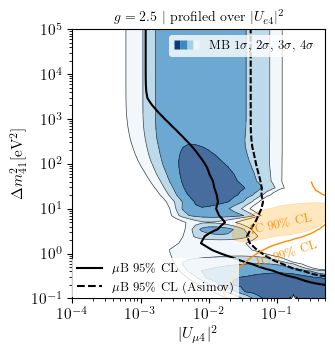

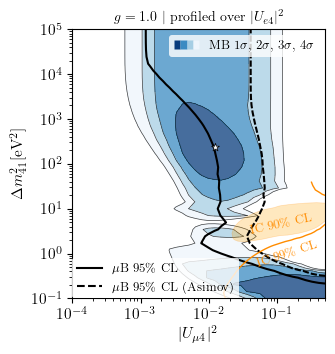

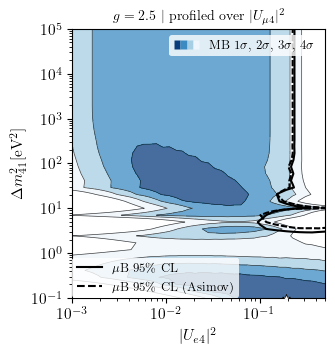

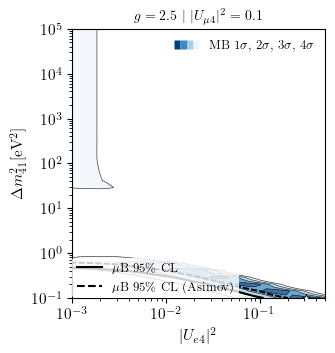

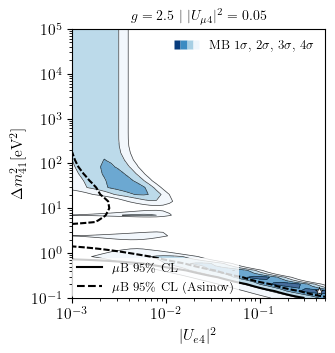

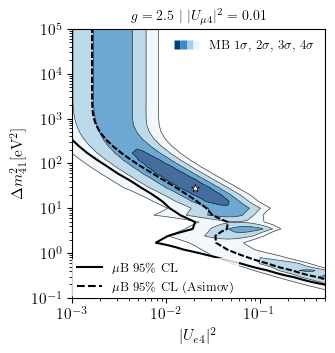

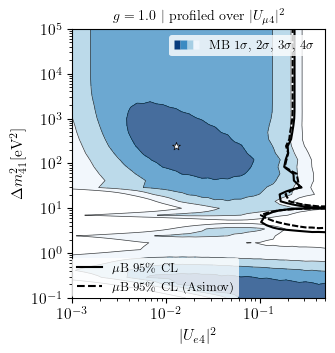

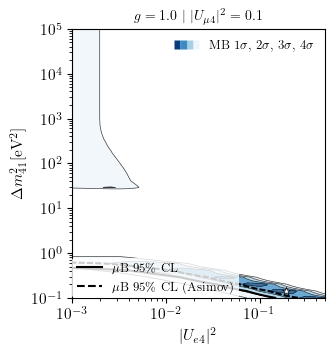

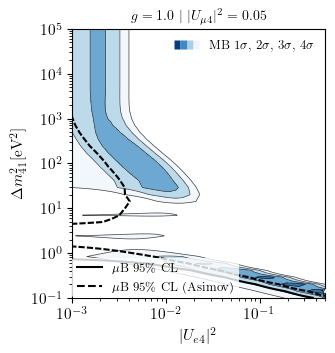

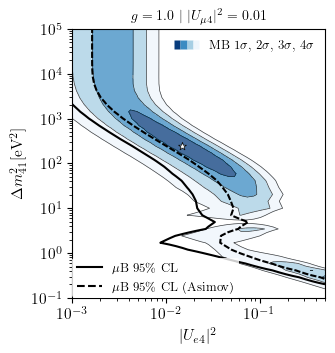

In [161]:
color = 'Blues_r'
make_mass_vs_mixing_plot(data_full_gfixed_2p5_Umu4prof, mixing='Umu4SQR', name=r'$g = 2.5$ $\vert$ profiled over $|U_{e4}|^2$', suffix='gfixed_2p5', plot_IC=True, n_sigmas=4, cmap_color=color)
make_mass_vs_mixing_plot(data_full_gfixed_1p0_Umu4prof, mixing='Umu4SQR', name=r'$g = 1.0$ $\vert$ profiled over $|U_{e4}|^2$', suffix='gfixed_1p0', plot_IC=True, n_sigmas=4, cmap_color=color)
# make_mass_vs_mixing_plot(data_full_gfixed_2p5_best, mixing='Umu4SQR', name=r'$g = 2.5$ $\vert$ $|U_{e 4}|^2 = 0.1$', suffix='gfixed_2p5_best', plot_IC=True, n_sigmas=4, cmap_color=color)
# make_mass_vs_mixing_plot(data_full_gfixed_2p5_solar, mixing='Umu4SQR', name=r'$g = 2.5$ $\vert$ $|U_{e 4}|^2 = 0.05$', suffix='gfixed_2p5_solar', plot_IC=True, n_sigmas=4, cmap_color=color, plot_Asimov=False)
# make_mass_vs_mixing_plot(data_full_gfixed_2p5_001, mixing='Umu4SQR', name=r'$g = 2.5$ $\vert$ $|U_{e 4}|^2 = 0.01$', suffix='gfixed_2p5_small', plot_IC=True, n_sigmas=4, cmap_color=color)


make_mass_vs_mixing_plot(data_full_gfixed_2p5_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 2.5$ $\vert$ profiled over $|U_{\mu 4}|^2$', suffix='gfixed_2p5', plot_IC=False, n_sigmas=4, cmap_color=color)
make_mass_vs_mixing_plot(data_full_gfixed_2p5_best_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 2.5$ $\vert$ $|U_{\mu 4}|^2 = 0.1$', suffix='gfixed_2p5_best', plot_IC=False, n_sigmas=4, cmap_color=color)
make_mass_vs_mixing_plot(data_full_gfixed_2p5_solar_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 2.5$ $\vert$ $|U_{\mu 4}|^2 = 0.05$', suffix='gfixed_2p5_solar', plot_IC=False, n_sigmas=4, cmap_color=color)
make_mass_vs_mixing_plot(data_full_gfixed_2p5_small_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 2.5$ $\vert$ $|U_{\mu 4}|^2 = 0.01$', suffix='gfixed_2p5_small', plot_IC=False, n_sigmas=4, cmap_color=color)


make_mass_vs_mixing_plot(data_full_gfixed_1p0_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 1.0$ $\vert$ profiled over $|U_{\mu 4}|^2$', suffix='gfixed_1p0', plot_IC=False, n_sigmas=4, cmap_color=color)
make_mass_vs_mixing_plot(data_full_gfixed_1p0_best_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 1.0$ $\vert$ $|U_{\mu 4}|^2 = 0.1$', suffix='gfixed_1p0_best', plot_IC=False, n_sigmas=4, cmap_color=color)
make_mass_vs_mixing_plot(data_full_gfixed_1p0_solar_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 1.0$ $\vert$ $|U_{\mu 4}|^2 = 0.05$', suffix='gfixed_1p0_solar', plot_IC=False, n_sigmas=4, cmap_color=color)
make_mass_vs_mixing_plot(data_full_gfixed_1p0_small_Ue4prof, mixing='Ue4SQR' ,name=r'$g = 1.0$ $\vert$ $|U_{\mu 4}|^2 = 0.01$', suffix='gfixed_1p0_small', plot_IC=False, n_sigmas=4, cmap_color=color)

In [50]:
# make_mixing_vs_mixing_plot(data_full_gfixed_2p5_dmfixed_500, name=r'$g_{\varphi} = 2.5$ $\vert$ $\Delta m_{41}^2 = 500$ eV$^2$', suffix='gfixed_2p5_dmfixed_500', plot_IC=True, n_sigmas=4, cmap_color=color)
# make_mixing_vs_mixing_plot(data_full_gfixed_2p5_dmfixed_500, name=r'$g_{\varphi} = 2.5$ $\vert$ $\Delta m_{41}^2 = 500$ eV$^2$', suffix='gfixed_2p5_dmfixed_500', plot_IC=True, n_sigmas=4, cmap_color=color)

# make_mixing_vs_mixing_plot(data_full_gfixed_1p0_dmfixed_100, name=r'$g_{\varphi} = 1.0$ $\vert$ $\Delta m_{41}^2 = 100$ eV$^2$', suffix='gfixed_1p0_dmfixed_100', plot_IC=True, n_sigmas=4, cmap_color=color)
# make_mixing_vs_mixing_plot(data_full_gfixed_1p0_dmfixed_100, name=r'$g_{\varphi} = 1.0$ $\vert$ $\Delta m_{41}^2 = 100$ eV$^2$', suffix='gfixed_1p0_dmfixed_100', plot_IC=True, n_sigmas=4, cmap_color=color)

NameError: name 'color' is not defined

In [46]:
labels_slices = [r'$g_\varphi$',r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', r"$|U_{e 4}|^2$", r"$|U_{\mu 4}|^2$", r"$\sin^2(2\theta_{\mu e})$"]
string_slices = [r'$g_\varphi$',r'$\Delta m_{41}^2$', r"$|U_{e 4}|^2$", r"$|U_{\mu 4}|^2$", r"$\sin^2(2\theta_{\mu e})$"]
def get_var(data, i):
    if i == 1:
        return data[:,1]**2
    return data[:,i]

def plot_all_slices(filename, xi=2, yi=3, zi=1, wi=0, w_fixed=1, global_deltachi2=False, n_sigmas=4, cmap_color='steelblue', cmin=0.05, cmax=0.95):
    data = param_scan.pickle_read(f"fit_data/{filename}.pkl")
    cut_in_w = data[np.argmin(np.abs(data[:,wi] == w_fixed)), wi]
    data = data[(data[:,wi] == cut_in_w)]
    
    MiniApp_chi2, MicroApp_chi2, MicroApp_Asimov_chi2 = data[:,-3], data[:,-2], data[:,-1] 
    
    x, y, z, w = get_var(data,xi), get_var(data,yi), get_var(data,zi), get_var(data,wi)
    i_min = np.argmin(MiniApp_chi2)
    x_min, y_min, z_min = x[i_min], y[i_min], z[i_min]
    
    z_slices = np.geomspace(np.min(z), np.max(z),9,endpoint=True)
    if z_min not in z_slices:
        z_slices = np.delete(z_slices, np.argmin(np.abs(z_slices - z_min)))
        z_slices = np.append(z_slices, z_min)
    z_slices = np.sort(z_slices)
    
    fig, axs = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True, constrained_layout=True)
    # plt.subplots_adjust(hspace=0, wspace=0)
    axs = axs.flatten()
    for i, z_slice in enumerate(z_slices):
        z_slice_true = z[np.argmin(np.abs(z - z_slice))]
        cut = (z == z_slice_true)

        ax = axs[i]
        ax.set_xscale('log')
        ax.set_yscale('log')
        if i in [0,3,6]:
            ax.set_ylabel(string_slices[yi], fontproperties=pt.font)
        # else:
            # ax.set_yticklabels([])
            
        if i in [6,7,8]:
            ax.set_xlabel(string_slices[xi], fontproperties=pt.font)
        else:
            ax.set_xticklabels([])
        ax.annotate(text=fr"{string_slices[zi]} $\,= {z_slice_true:.3f}$", 
                    xycoords='axes fraction', 
                    xy=(0.05,0.9), 
                    fontsize=10, 
                    bbox=dict(facecolor='white', edgecolor='None', alpha=0.9, boxstyle='round'))

        le = len(np.unique(x))
        kwargs_interp = {'fine_gridx': le,  
                        'fine_gridy': le, 
                        'logx':True, 
                        'logy':True,
                        }

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MiniApp_chi2[cut]-np.min(MiniApp_chi2), **kwargs_interp)
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MiniApp_chi2[cut]-np.min(MiniApp_chi2[cut]), **kwargs_interp)
        
        colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
        cs = ax.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=['darkorange','orange','peachpuff'], zorder=1, alpha=0.75)
        cs = ax.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, 2), colors=['black','black','black'], linewidths=0.25, zorder=1, alpha=0.75)

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_chi2[cut] - np.min(MicroApp_chi2), **kwargs_interp)
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_chi2[cut] - np.min(MicroApp_chi2[cut]), **kwargs_interp)
        cs = ax.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL(0.95, 2), colors=['black'], zorder=2)

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_Asimov_chi2[cut] - np.min(MicroApp_Asimov_chi2), **kwargs_interp)
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_Asimov_chi2[cut] - np.min(MicroApp_Asimov_chi2[cut]), **kwargs_interp)
        cs = ax.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL(0.95, 2), colors=['black'], linestyles=[(1,(3,1))], zorder=2)
        if z_min == z_slice:
            ax.scatter(x_min, y_min, marker='*', color='black',)
        ax.tick_params(axis="both", which='both', direction="inout", left="off", labelleft="on")
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
        if i == 0:
            h, l = ax.get_legend_handles_labels()
            h.append(pt.MulticolorPatch(colors))
            mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
            l.append(mb_label)
            ax.plot([], [], color='black', lw=1.5, label='$\mu$B 95\% CL')
            ax.plot([], [], color='black', lw=1.5, ls='--', label='$\mu$B 95\% CL (Asimov)')

            ax.legend(h, l, loc=(0,0), fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()})
    fig.suptitle(fr'{string_slices[wi]} $\,= {w_fixed:.2f}$')
    fig.savefig(f"{micro.path_plots}/{filename}_allslices_{xi}_{yi}_{zi}_{wi}_{w_fixed:.3f}{'_global' if global_deltachi2 else ''}.pdf", bbox_inches='tight', dpi=300)



### Ue4 vs dm4 (profile over Umu4)

In [47]:
labels_slices = [r'$g_\varphi$',r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', r"$|U_{e 4}|^2$", r"$|U_{\mu 4}|^2$", r"$\sin^2(2\theta_{\mu e})$"]
string_slices = [r'$g_\varphi$',r'$\Delta m_{41}^2$', r"$|U_{e 4}|^2$", r"$|U_{\mu 4}|^2$", r"$\sin^2(2\theta_{\mu e})$"]
def get_var(data, i):
    if i == 1:
        return data[:,1]**2
    return data[:,i]

def plot_all_slices(filename, xi=2, yi=3, zi=1, z_range=None, wi=0, w_fixed=1, global_deltachi2=False, n_sigmas=4, plot_Asimov=True, cmap_color='steelblue', microColor='black', microColor_2='grey', cmin=0.05, cmax=0.9):
    data = param_scan.pickle_read(f"fit_data/{filename}.pkl")
    cut_in_w = data[np.argmin(np.abs(data[:,wi] - w_fixed)), wi]
    data = data[(data[:,wi] == cut_in_w)]

    MiniApp_chi2, MicroApp_chi2, MicroApp_Asimov_chi2 = data[:,-3], data[:,-2], data[:,-1] 
    
    x, y, z, w = get_var(data,xi), get_var(data,yi), get_var(data,zi), get_var(data, wi)
    i_min = np.argmin(MiniApp_chi2)
    x_min, y_min, z_min = x[i_min], y[i_min], z[i_min]
    if z_range is not None:
        z_slices = np.geomspace(z_range[0], z_range[1], 9,endpoint=True)
    else:
        z_slices = np.geomspace(np.min(z), np.max(z),9,endpoint=True)

    if z_min not in z_slices:
        z_slices = np.delete(z_slices, np.argmin(np.abs(z_slices - z_min)))
        z_slices = np.append(z_slices, z_min)
    z_slices = np.sort(z_slices)
    
    fig, axs = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False, constrained_layout=False)
    plt.subplots_adjust(hspace=0.075, wspace=0.05)
    axs = axs.flatten()
    for i, z_slice in enumerate(z_slices):
        z_slice_true = z[np.argmin(np.abs(z - z_slice))]
        cut = (z == z_slice_true)

        ax = axs[i]
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.tick_params(axis="both", which='both', direction="inout", left="off", labelleft="on", zorder=10)
        # ax.set_xticklabels(fontsize=13)
        # ax.set_yticklabels(fontsize=13)

        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())

        if i in [0,3,6]:
            ylabel = string_slices[yi]
            if yi == 1:
                ylabel += r"/eV$^2$"

            ax.set_ylabel(ylabel, fontproperties=pt.font, fontsize=11)
        else:
            ax.set_yticklabels([])
            
        if i in [6,7,8]:
            ax.set_xlabel(string_slices[xi], fontproperties=pt.font, fontsize=11)
        else:
            ax.set_xticklabels([])

        fixed_value = fr"{string_slices[zi]} \,$= {pt.sci_notation(z_slice_true, sig_digits=1, notex=True, optional_sci=2)}$"
        if zi == 1:
            fixed_value += r"\, eV$^2$"
        ax.annotate(text=fixed_value, 
                    xycoords='axes fraction', 
                    xy=(0.05,0.86), 
                    fontsize=11, 
                    bbox=dict(facecolor='white', edgecolor='None', alpha=0.9, boxstyle='round'))

        kwargs_interp = {   'fine_gridx': len(np.unique(x)),  
                            'fine_gridy': len(np.unique(y)), 
                            'logx':True, 
                            'logy':True,
                        }

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MiniApp_chi2[cut]-np.min(MiniApp_chi2), **kwargs_interp)
            ndof = 3
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MiniApp_chi2[cut]-np.min(MiniApp_chi2[cut]), **kwargs_interp)
            ndof = 2
        
        colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
        cs = ax.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, ndof), colors=colors, zorder=1, alpha=1)
        cs = ax.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, ndof), colors=['black','black','black'], linewidths=0.25, zorder=1, alpha=1)
        ax.scatter(X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], marker='*', facecolor='white', edgecolor='black', lw=0.5, zorder=10)
        # print('Minimum: ', X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], np.min(Z))

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_chi2[cut] - np.min(MicroApp_chi2), **kwargs_interp)
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_chi2[cut] - np.min(MicroApp_chi2[cut]), **kwargs_interp)
        cs = ax.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(2,ndof),pt.get_chi2vals_w_sigma(3,ndof)], colors=[microColor,microColor], zorder=2, linewidths=1.5, linestyles=['-', (1,(3,0.5))])

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_Asimov_chi2[cut] - np.min(MicroApp_Asimov_chi2), **kwargs_interp)
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_Asimov_chi2[cut] - np.min(MicroApp_Asimov_chi2[cut]), **kwargs_interp)
        if plot_Asimov:
            cs = ax.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.99], ndof), colors=[microColor_2], linestyles=[(1,(3,0.5))], linewidths=1, zorder=2)
        if z_min == z_slice:
            ax.scatter(x_min, y_min, marker='*', facecolor='black', edgecolor='black', lw=0.25, zorder=10)
        if i == 0:
            ax.plot([], [], color=microColor, lw=1.5, label='$\mu$B 2$\sigma$')
            ax.plot([], [], color=microColor, lw=1.5, ls=(1,(3,0.5)), label='$\mu$B 3$\sigma$')
            h, l = ax.get_legend_handles_labels()
            h.append(pt.MulticolorPatch(colors))
            mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
            l.append(mb_label)
            ax.legend(h, l, loc=(0,0), fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()})
    nstring = r'n_{\rm dof}'
    ndof = rf' $\vert$ ${nstring} = {ndof}$'
    axs[1].annotate(text=fr"{string_slices[wi]} $\,= {w_fixed:.2f}${ndof}", xycoords='axes fraction', xy=(0.5,1.075), fontsize=10, ha='center', zorder=10)
    fig.savefig(f"{micro.path_plots}/MH_decay_allslices_{xi}_{yi}_{zi}_{wi}_{w_fixed:.3f}{'_global' if global_deltachi2 else ''}.pdf", bbox_inches='tight', dpi=350)



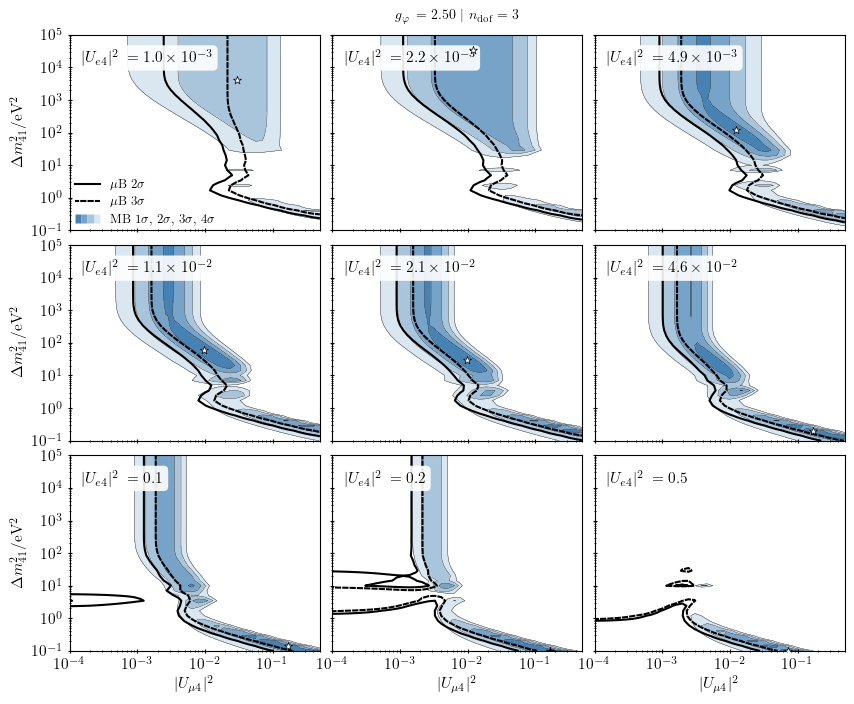

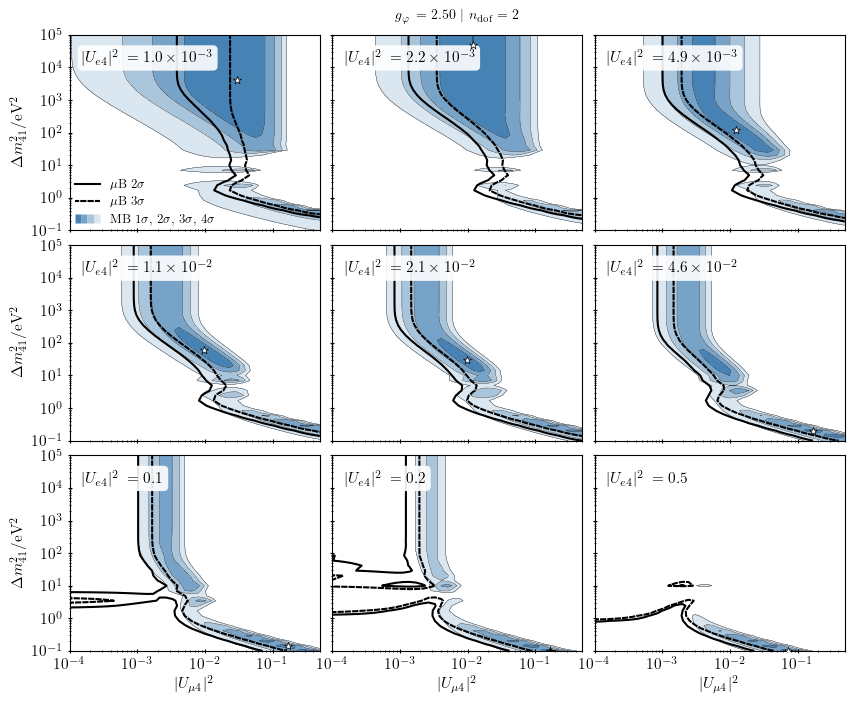

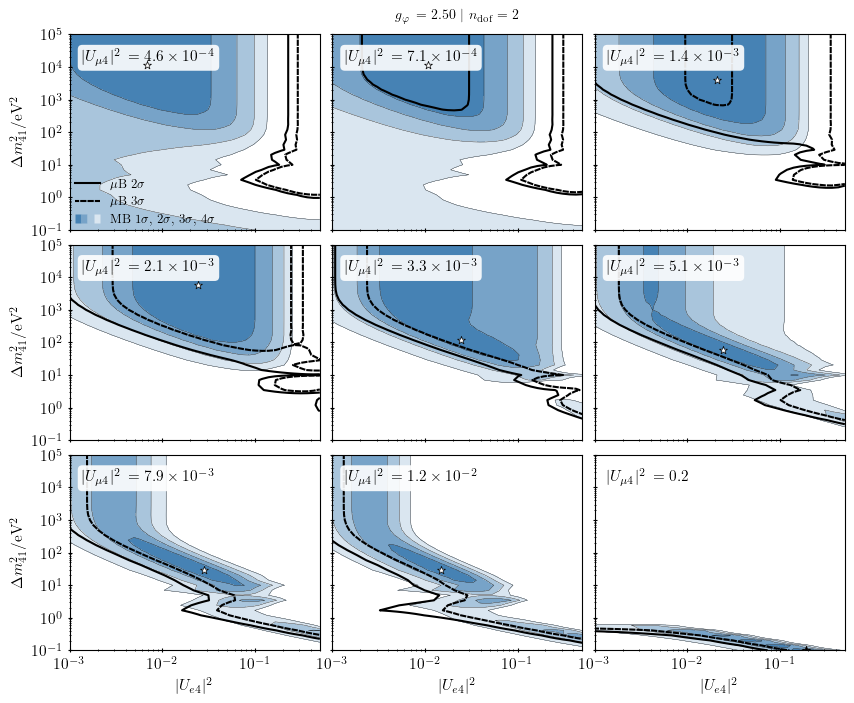

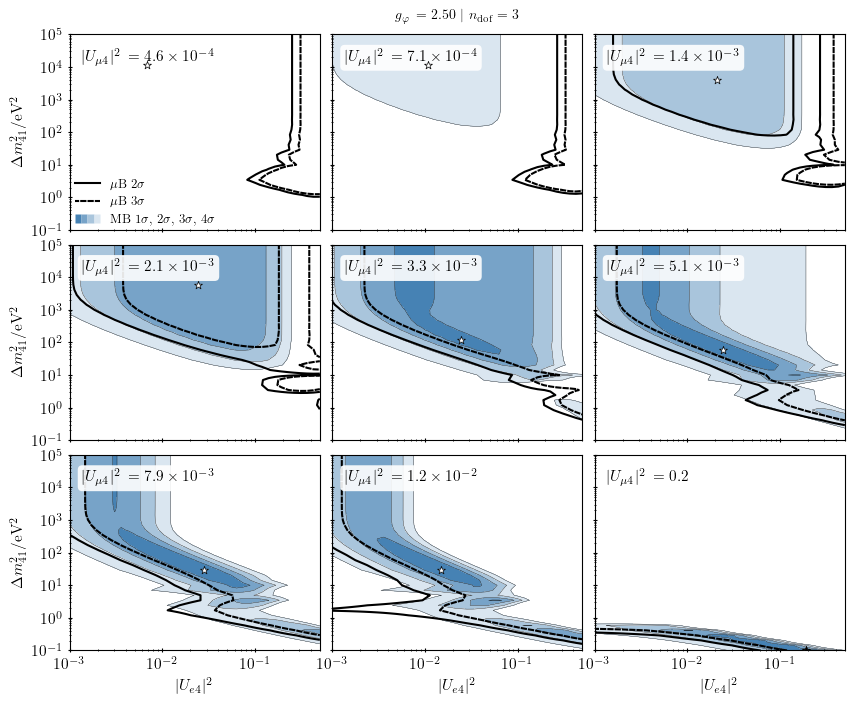

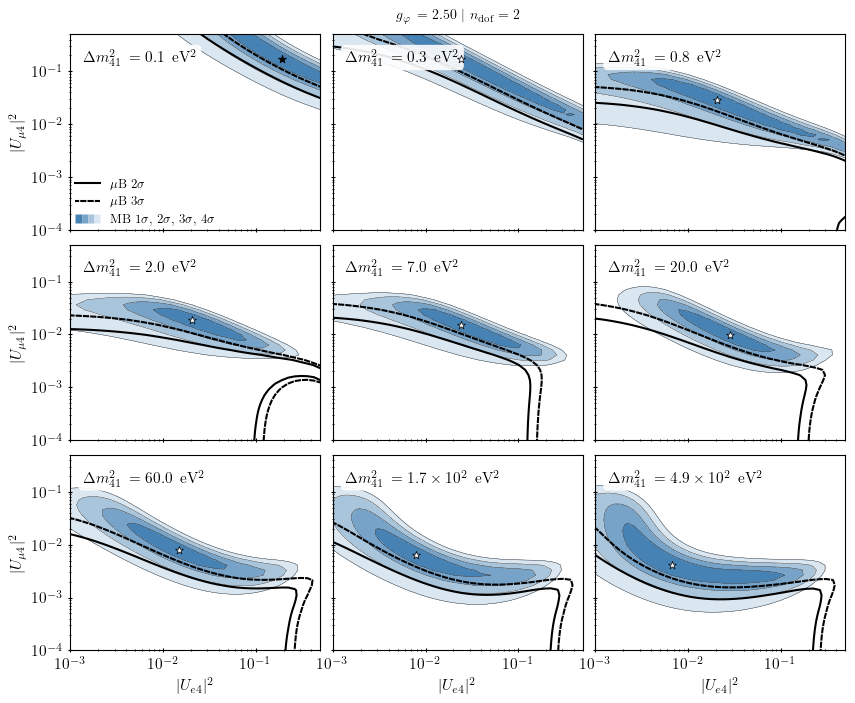

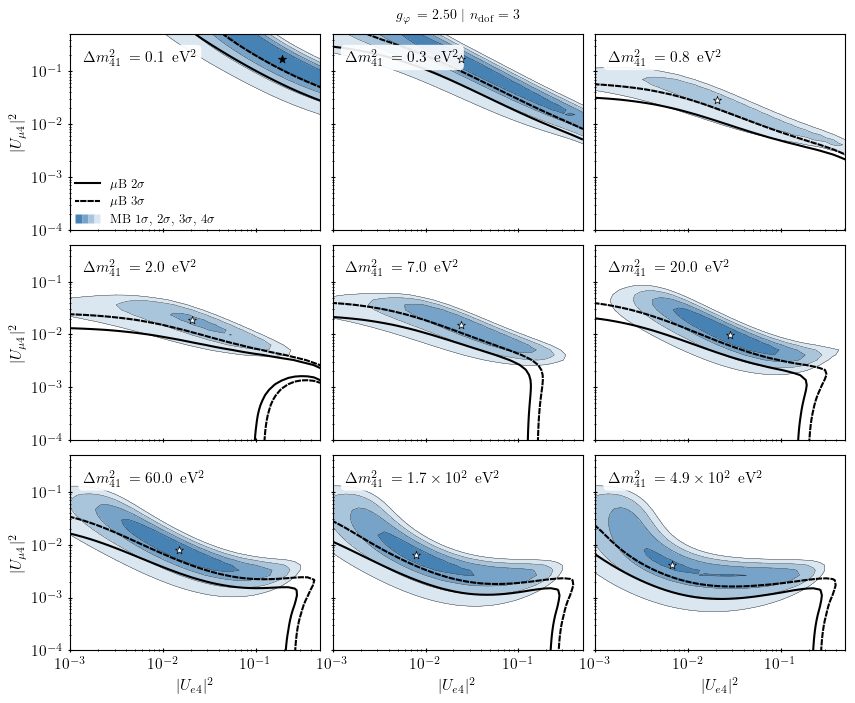

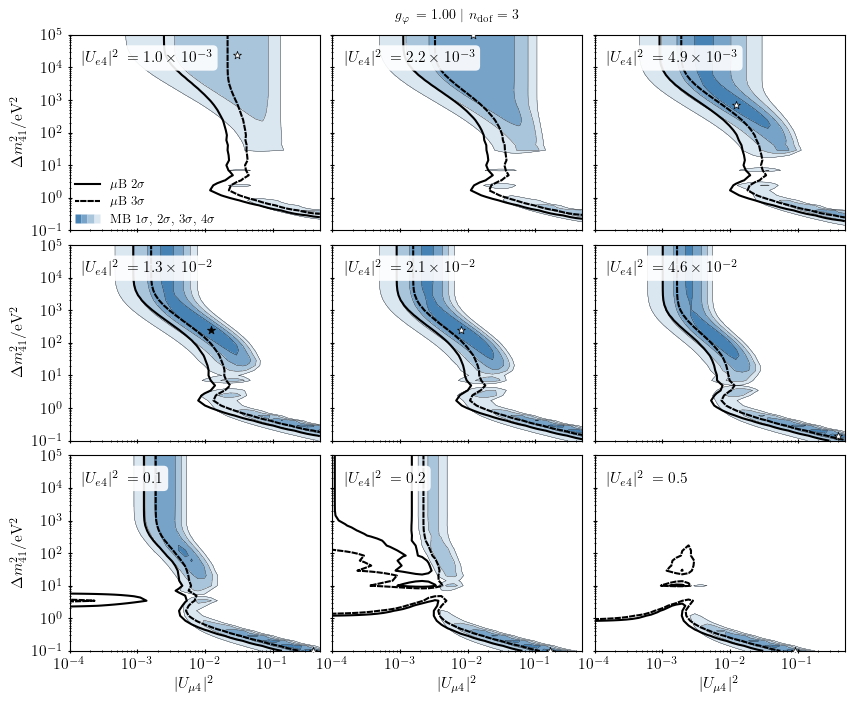

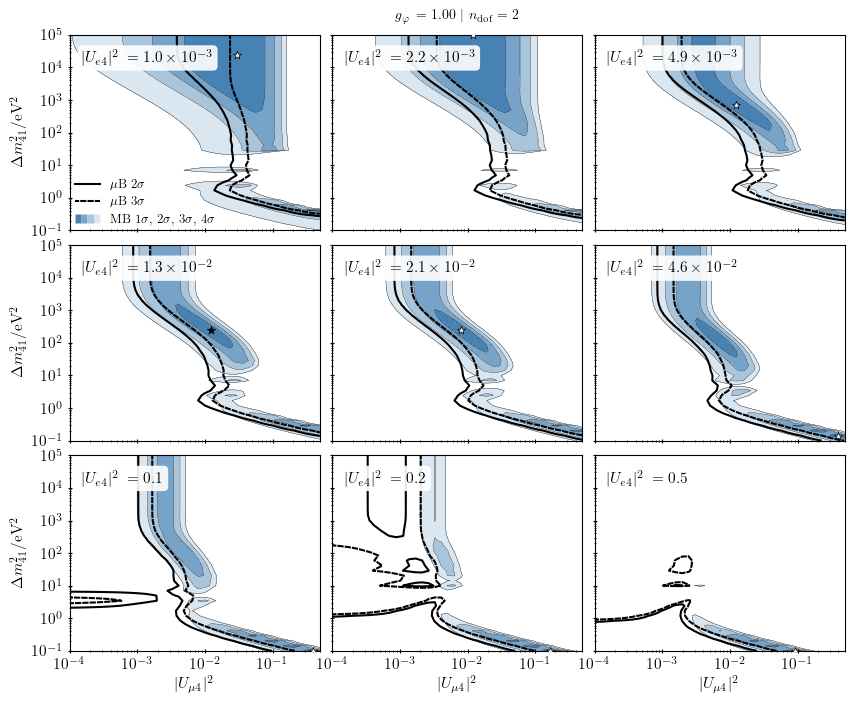

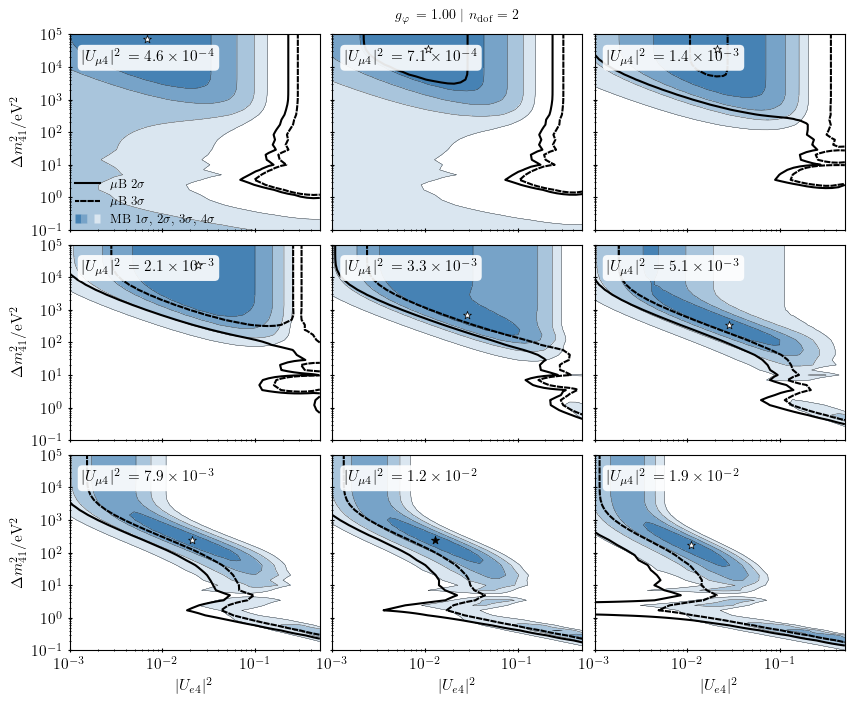

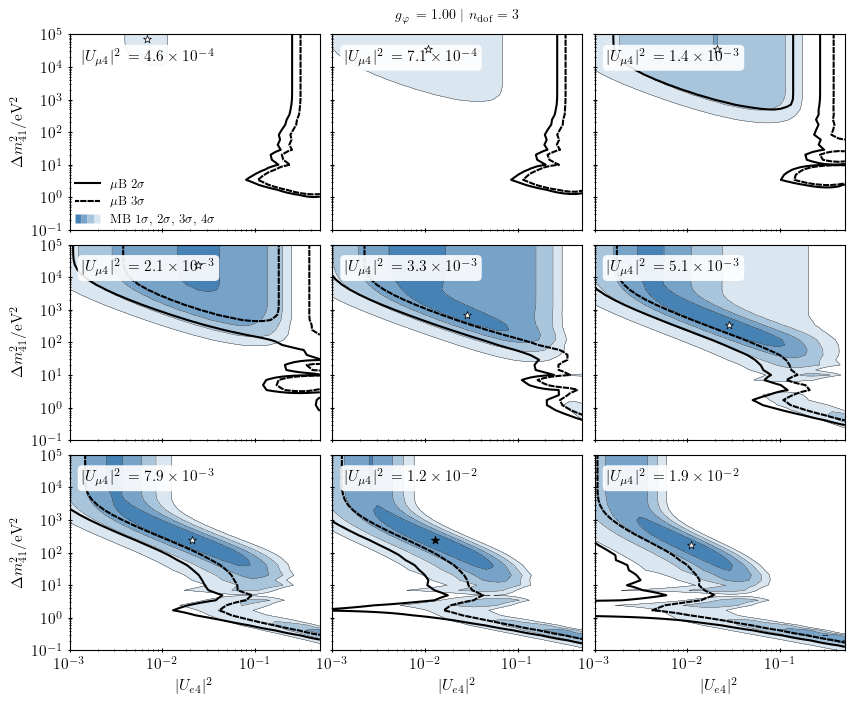

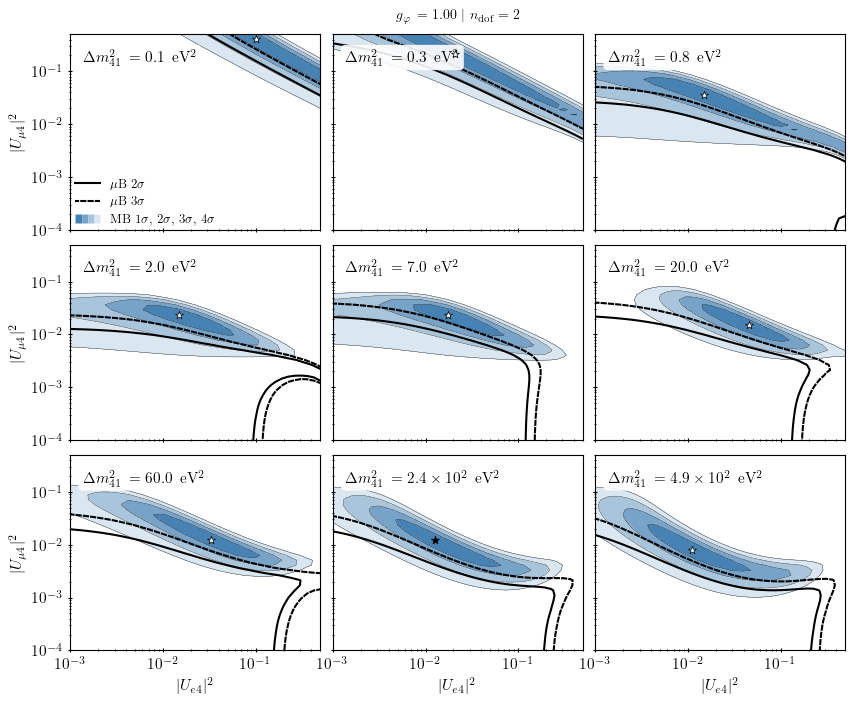

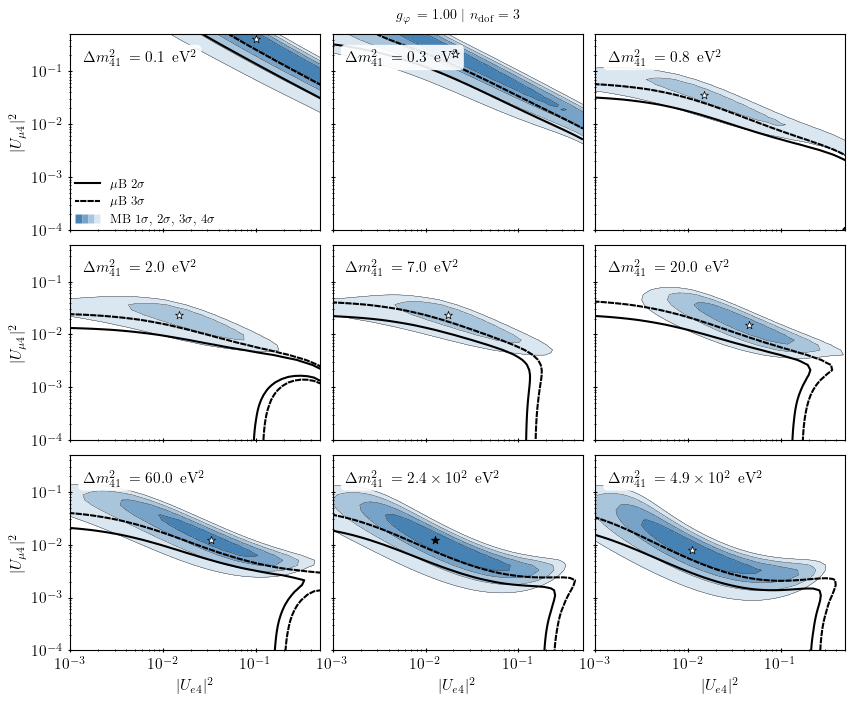

In [49]:
CMAP = 'steelblue'
microColor='black'
microColor_2 = 'darkorange'
kwargs = {'plot_Asimov': False, 'microColor': microColor, 'microColor_2': microColor_2, 'cmap_color': CMAP, 'n_sigmas': 4, 'cmin': 0.0, 'cmax': 0.8}

plot_all_slices('MH_decay_gfixed_2.5_3D_40', xi=3, yi=1, zi=2, z_range=[1e-3, 0.5], wi=0, w_fixed=2.5, global_deltachi2=True, **kwargs)
plot_all_slices('MH_decay_gfixed_2.5_3D_40', xi=3, yi=1, zi=2, z_range=[1e-3, 0.5], wi=0, w_fixed=2.5, global_deltachi2=False, **kwargs)

plot_all_slices('MH_decay_gfixed_2.5_3D_40', xi=2, yi=1, zi=3, z_range=[5e-4, 0.02], wi=0, w_fixed=2.5, global_deltachi2=False, **kwargs)
plot_all_slices('MH_decay_gfixed_2.5_3D_40', xi=2, yi=1, zi=3, z_range=[5e-4, 0.02], wi=0, w_fixed=2.5, global_deltachi2=True, **kwargs)

plot_all_slices('MH_decay_gfixed_2.5_3D_40', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=2.5, global_deltachi2=False, **kwargs)
plot_all_slices('MH_decay_gfixed_2.5_3D_40', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=2.5, global_deltachi2=True, **kwargs)


plot_all_slices('MH_decay_gfixed_1.0_3D_40', xi=3, yi=1, zi=2, z_range=[1e-3, 0.5], wi=0, w_fixed=1.0, global_deltachi2=True, **kwargs)
plot_all_slices('MH_decay_gfixed_1.0_3D_40', xi=3, yi=1, zi=2, z_range=[1e-3, 0.5], wi=0, w_fixed=1.0, global_deltachi2=False, **kwargs)

plot_all_slices('MH_decay_gfixed_1.0_3D_40', xi=2, yi=1, zi=3, z_range=[5e-4, 0.02], wi=0, w_fixed=1.0, global_deltachi2=False, **kwargs)
plot_all_slices('MH_decay_gfixed_1.0_3D_40', xi=2, yi=1, zi=3, z_range=[5e-4, 0.02], wi=0, w_fixed=1.0, global_deltachi2=True, **kwargs)

plot_all_slices('MH_decay_gfixed_1.0_3D_40', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=1.0, global_deltachi2=False, **kwargs)
plot_all_slices('MH_decay_gfixed_1.0_3D_40', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=1.0, global_deltachi2=True, **kwargs)


In [57]:
# color='Blues_r'
# plot_all_slices('MH_decay_test_30', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=2.8, global_deltachi2=False, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=2.8, global_deltachi2=True, cmap_color=color)

# plot_all_slices('MH_decay_test_30', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=1, global_deltachi2=False, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=2, yi=3, zi=1, z_range=[0.1, 500], wi=0, w_fixed=1, global_deltachi2=True, cmap_color=color)


In [56]:
# color = 'Blues_r'
# plot_all_slices('MH_decay_test_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.2, global_deltachi2=False, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.1, global_deltachi2=False, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.05, global_deltachi2=False, cmap_color=color)

# plot_all_slices('MH_decay_test_30', xi=2, yi=1, zi=0, wi=3, w_fixed=0.1, global_deltachi2=False, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=2, yi=1, zi=0, wi=3, w_fixed=0.05, global_deltachi2=False, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=2, yi=1, zi=0, wi=3, w_fixed=0.01, global_deltachi2=False, cmap_color=color)


# plot_all_slices('MH_decay_test_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.1, global_deltachi2=True, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.05, global_deltachi2=True, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=2, yi=1, zi=0, wi=3, w_fixed=0.05, global_deltachi2=True, cmap_color=color)
# plot_all_slices('MH_decay_test_30', xi=2, yi=1, zi=0, wi=3, w_fixed=0.01, global_deltachi2=True, cmap_color=color)

### GIFs

In [232]:
import matplotlib.animation
from matplotlib.animation import FuncAnimation

# Your existing function with a few modifications
def make_gif(filename, xi=2, yi=3, zi=1, z_range=None, wi=0, w_fixed=1, frames = 10, global_deltachi2=False, osc=False, plot_Asimov=True, microColor='darkorange', microColor_2='grey', cmap_color='steelblue', n_sigmas=4, cmin=0.05, cmax=0.95):
    data = param_scan.pickle_read(f"fit_data/{filename}.pkl")
    cut_in_w = data[np.argmin(np.abs(data[:,wi] - w_fixed)), wi]
    data = data[(data[:,wi] == cut_in_w)]

    MiniApp_chi2, MicroApp_chi2, MicroApp_Asimov_chi2 = data[:,-3], data[:,-2], data[:,-1] 
    
    x, y, z, w = get_var(data,xi), get_var(data,yi), get_var(data,zi), get_var(data, wi)
    i_min = np.argmin(MiniApp_chi2)
    x_min, y_min, z_min = x[i_min], y[i_min], z[i_min]
    if len(np.unique(z)) < frames:
        print("Adjusting number of frames to match number of unique z values")
        frames = len(np.unique(z))
    if z_range is not None:
        z_slices = np.geomspace(z_range[0], z_range[1], frames,endpoint=True)
    else:
        z_slices = np.geomspace(np.min(z), np.max(z), frames, endpoint=True)

    if z_min not in z_slices:
        z_slices = np.delete(z_slices, np.argmin(np.abs(z_slices - z_min)))
        z_slices = np.append(z_slices, z_min)
    z_slices = np.sort(z_slices)
    
    fig, ax = pt.std_fig(figsize=(4, 4), ax_form=pt.std_axes_form)
    # Create a function to update the plot for each frame
    def update(frame):
        ax.clear()
        z_slice = z_slices[frame]
        z_slice_true = z[np.argmin(np.abs(z - z_slice))]
        cut = (z == z_slice_true)
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.tick_params(axis="both", which='both', direction="inout", left="off", labelleft="on", zorder=10)

        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
        ax.set_ylabel(string_slices[yi], fontproperties=pt.font, fontsize=10)    
        ax.set_xlabel(string_slices[xi], fontproperties=pt.font, fontsize=10)

        fixed_value = fr"{string_slices[zi]} \,$= {pt.sci_notation(z_slice_true, sig_digits=1, notex=True, optional_sci=3)}$"
        if zi == 1:
            fixed_value += r"\, eV$^2$"

        kwargs_interp = {   'fine_gridx': len(np.unique(x)),  
                            'fine_gridy': len(np.unique(y)), 
                            'logx':True, 
                            'logy':True,
                            'method': 'interpolate',

                        }

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MiniApp_chi2[cut]-np.min(MiniApp_chi2), **kwargs_interp)
            ndof = 3
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MiniApp_chi2[cut]-np.min(MiniApp_chi2[cut]), **kwargs_interp)
            ndof = 2
        
        colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
        cs = ax.contourf(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, ndof), colors=colors, zorder=1, alpha=1)
        cs = ax.contour(X,Y,Z, levels=pt.get_chi2vals_w_nsigmas(n_sigmas, ndof), colors=['black','black','black'], linewidths=0.5, zorder=1, alpha=1)
        ax.scatter(X.flatten()[np.nanargmin(Z)], Y.flatten()[np.nanargmin(Z)], marker='*', facecolor='white', edgecolor='black', lw=0.5, zorder=10)

        if global_deltachi2:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_chi2[cut] - np.min(MicroApp_chi2), **kwargs_interp)
        else:
            X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_chi2[cut] - np.min(MicroApp_chi2[cut]), **kwargs_interp)
        # cs = ax.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.95], ndof), colors=['black'], linestyles=[(1,(3,1))], zorder=2)
        cs = ax.contour(X,Y,Z, levels=[pt.get_chi2vals_w_sigma(2,ndof),pt.get_chi2vals_w_sigma(3,ndof)], colors=[microColor,microColor], zorder=2, linewidths=1.5, linestyles=['-', (1,(3,0.5))])

        # if global_deltachi2:
        #     X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_Asimov_chi2[cut] - np.min(MicroApp_Asimov_chi2), **kwargs_interp)
        # else:
        #     X, Y, Z = pt.interp_grid(x[cut], y[cut], MicroApp_Asimov_chi2[cut] - np.min(MicroApp_Asimov_chi2[cut]), **kwargs_interp)


        if z_min == z_slice:
            ax.scatter(x_min, y_min, marker='*', facecolor='black', edgecolor='black', lw=0.25, zorder=10)

        ax.plot([], [], color=microColor, lw=1.5, label='$\mu$B 2$\sigma$')
        ax.plot([], [], color=microColor, lw=1.5, ls=(1,(3,0.5)), label='$\mu$B 3$\sigma$')
        h, l = ax.get_legend_handles_labels()
        h.append(pt.MulticolorPatch(colors))
        mb_label = 'MB '+', '.join([fr'${i+1} \sigma$' for i in range(n_sigmas)])
        l.append(mb_label)
        ax.legend(h, l, loc=(0,0), fontsize=9, handler_map={pt.MulticolorPatch: pt.MulticolorPatchHandler()})

        nstring = r'n_{\rm dof}'
        if osc:
            ndof = rf'${nstring} = {ndof}$'
            ax.annotate(text=fr"{ndof} $\vert$ {fixed_value}", xycoords='axes fraction', xy=(0.5,1.025), fontsize=10, ha='center', zorder=10)
        else:
            ndof = rf' $\vert$ ${nstring} = {ndof}$'
            ax.annotate(text=fr"{string_slices[wi]} $\,= {w_fixed:.2f}${ndof} $\vert$ {fixed_value}", xycoords='axes fraction', xy=(0.5,1.025), fontsize=10, ha='center', zorder=10)

        # Return a tuple of the artists that have been updated. This tells the animation framework what parts of the plot should be animated.
        return (cs,)

    # Create the animation object. This will animate the 'update' function across the frames of your z_slices.
    anim = FuncAnimation(fig, update, frames=frames, blit=True)

    # Save the animation to a file
    anim.save(f"{micro.path_plots}/MH_gif_{xi}_{yi}_{zi}_{wi}_{w_fixed:.3f}{'_global' if global_deltachi2 else ''}.gif", writer='Pillow', fps=5, dpi=300)  

MovieWriter Pillow unavailable; using Pillow instead.


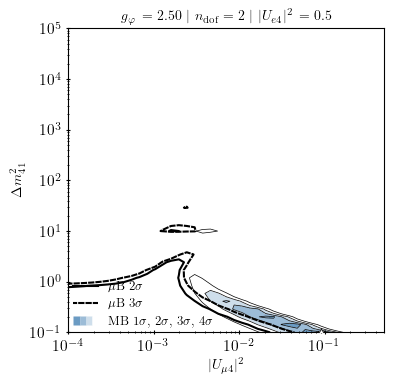

In [224]:
make_gif('MH_decay_gfixed_2.5_3D_40', xi=3, yi=1, zi=2, wi=0, w_fixed=2.5, global_deltachi2=False, frames=3, **kwargs)

MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


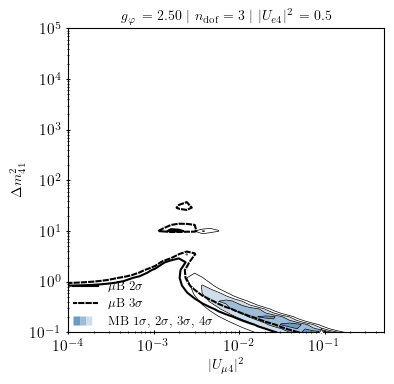

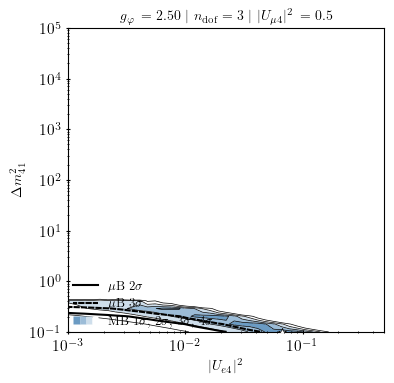

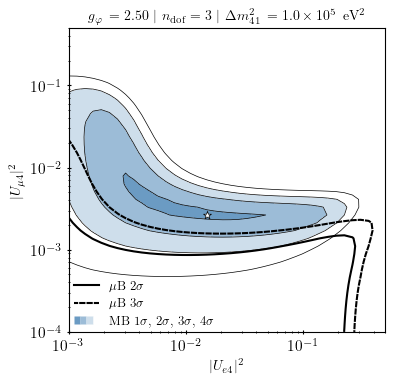

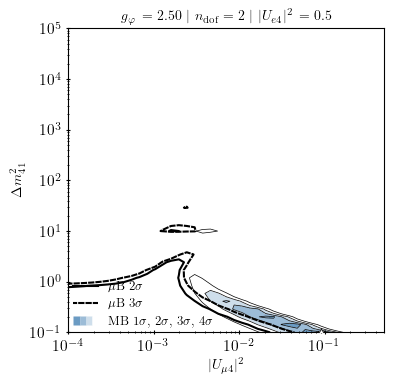

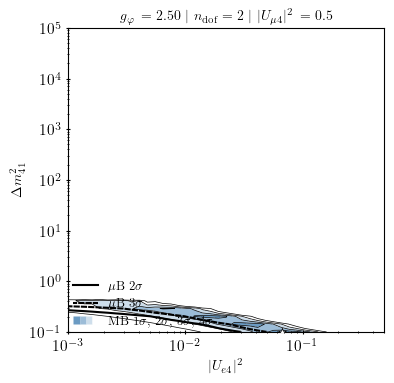

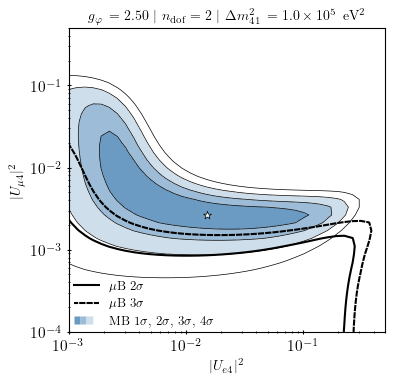

In [225]:
CMAP = 'steelblue'
microColor='black'
microColor_2 = 'darkorange'
kwargs = {'plot_Asimov': False, 'microColor': microColor, 'microColor_2': microColor_2, 'cmap_color': CMAP, 'n_sigmas': 4, 'cmin': 0.2, 'cmax': 1}

make_gif('MH_decay_gfixed_2.5_3D_40', xi=3, yi=1, zi=2, wi=0, w_fixed=2.5, global_deltachi2=True, frames=60, **kwargs)
make_gif('MH_decay_gfixed_2.5_3D_40', xi=2, yi=1, zi=3, wi=0, w_fixed=2.5, global_deltachi2=True, frames=60, **kwargs)
make_gif('MH_decay_gfixed_2.5_3D_40', xi=2, yi=3, zi=1, wi=0, w_fixed=2.5, global_deltachi2=True, frames=60, **kwargs)


make_gif('MH_decay_gfixed_2.5_3D_40', xi=3, yi=1, zi=2, wi=0, w_fixed=2.5, global_deltachi2=False, frames=60, **kwargs)
make_gif('MH_decay_gfixed_2.5_3D_40', xi=2, yi=1, zi=3, wi=0, w_fixed=2.5, global_deltachi2=False, frames=60, **kwargs)
make_gif('MH_decay_gfixed_2.5_3D_40', xi=2, yi=3, zi=1, wi=0, w_fixed=2.5, global_deltachi2=False, frames=60, **kwargs)



MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


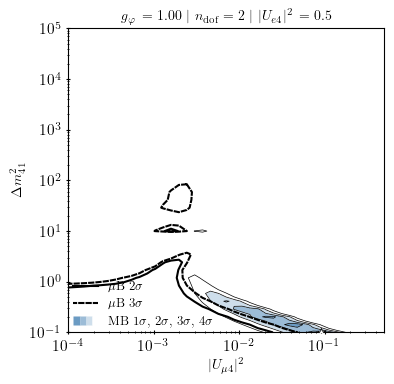

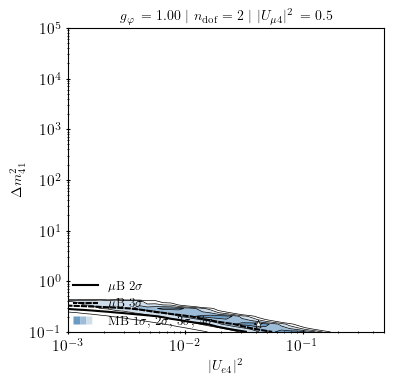

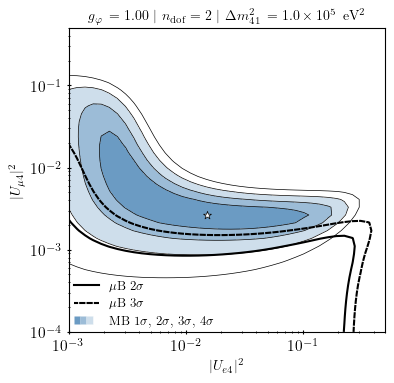

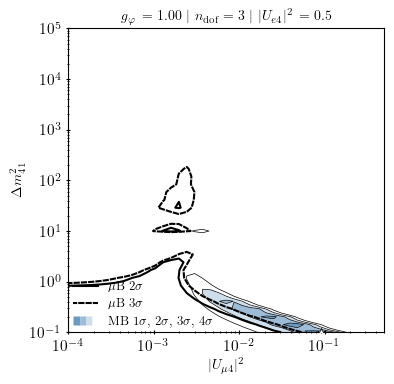

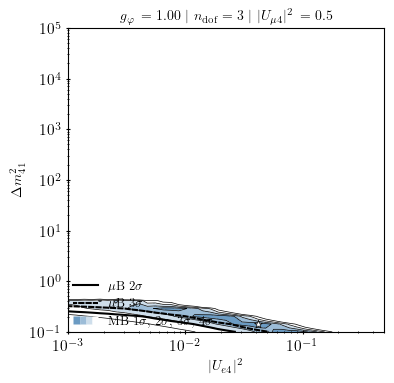

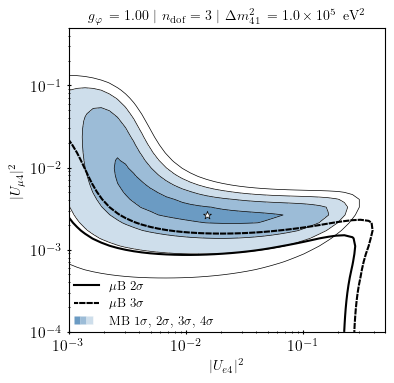

In [226]:
make_gif('MH_decay_gfixed_1.0_3D_40', xi=3, yi=1, zi=2, wi=0, w_fixed=1.0, global_deltachi2=False, frames=60, **kwargs)
make_gif('MH_decay_gfixed_1.0_3D_40', xi=2, yi=1, zi=3, wi=0, w_fixed=1.0, global_deltachi2=False, frames=60, **kwargs)
make_gif('MH_decay_gfixed_1.0_3D_40', xi=2, yi=3, zi=1, wi=0, w_fixed=1.0, global_deltachi2=False, frames=60, **kwargs)

make_gif('MH_decay_gfixed_1.0_3D_40', xi=3, yi=1, zi=2, wi=0, w_fixed=1.0, global_deltachi2=True, frames=60, **kwargs)
make_gif('MH_decay_gfixed_1.0_3D_40', xi=2, yi=1, zi=3, wi=0, w_fixed=1.0, global_deltachi2=True, frames=60, **kwargs)
make_gif('MH_decay_gfixed_1.0_3D_40', xi=2, yi=3, zi=1, wi=0, w_fixed=1.0, global_deltachi2=True, frames=60, **kwargs)

MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


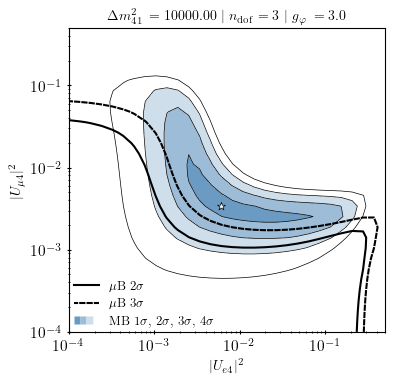

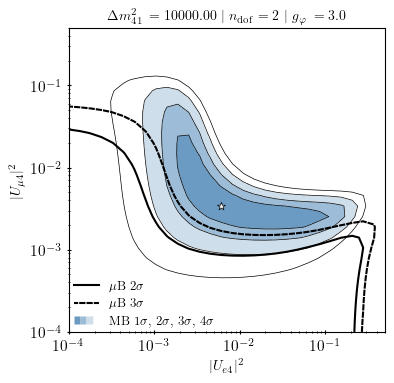

In [227]:
make_gif('MH_decay_4D_30', xi=2, yi=3, zi=0, wi=1, w_fixed=1e4, global_deltachi2=True, frames=60, **kwargs)
make_gif('MH_decay_4D_30', xi=2, yi=3, zi=0, wi=1, w_fixed=1e4, global_deltachi2=False, frames=60, **kwargs)

MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


MovieWriter Pillow unavailable; using Pillow instead.


Adjusting number of frames to match number of unique z values


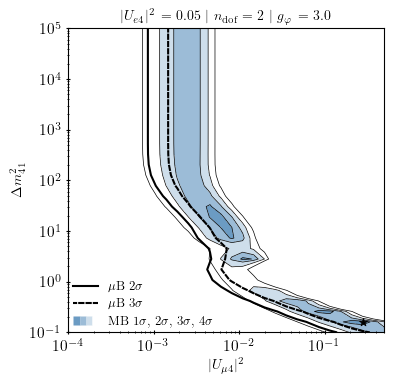

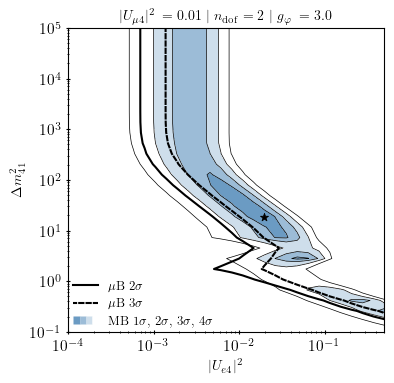

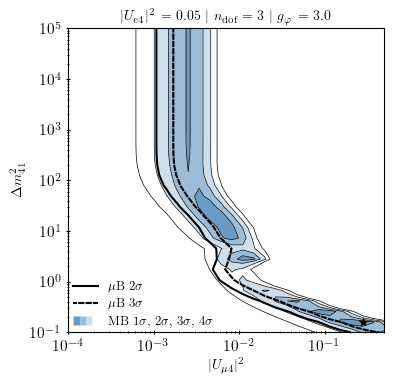

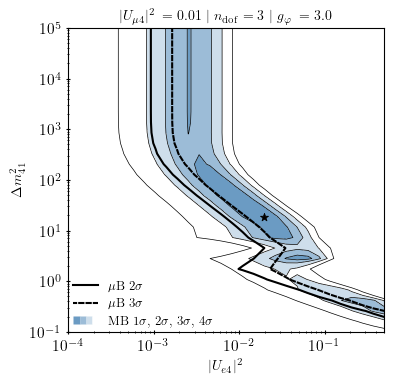

In [228]:
make_gif('MH_decay_4D_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.05, global_deltachi2=False, frames=60, **kwargs)
make_gif('MH_decay_4D_30', xi=2, yi=1, zi=0, wi=3, w_fixed=0.01, global_deltachi2=False, frames=60, **kwargs)


make_gif('MH_decay_4D_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.05, global_deltachi2=True, frames=60, **kwargs)
make_gif('MH_decay_4D_30', xi=2, yi=1, zi=0, wi=3, w_fixed=0.01, global_deltachi2=True, frames=60, **kwargs)

In [229]:
cmap_color = 'Blues_r'
make_gif('MH_decay_test_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.1, global_deltachi2=False, cmap_color=color)
make_gif('MH_decay_test_30', xi=3, yi=1, zi=0, wi=2, w_fixed=0.05, global_deltachi2=False, cmap_color=color)

FileNotFoundError: [Errno 2] No such file or directory: 'fit_data/MH_decay_test_30.pkl'